# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, mutual_info_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# LOAD DATA

In [2]:
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data_2007_2014.csv')

/tmp/ipython-input-2-2864058545.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data_2007_2014.csv')


In [3]:
df_loan = df_original.copy()

In [4]:
df_loan.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

# EDA

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df_loan.describe().T

count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq

In [7]:
df_cleaned = df_loan.dropna(subset=['loan_status'])

nilai_unik = df_cleaned['loan_status'].nunique()
print(f"Total jumlah kategori unik: {nilai_unik}")
jumlah_nilaiUnik = df_cleaned['loan_status'].value_counts()
persentase_nilaiUnik = df_cleaned['loan_status'].value_counts(normalize=True) * 100
summary_df = pd.DataFrame({'Jumlah': jumlah_nilaiUnik,
    'Persentase (%)': persentase_nilaiUnik.round(2)})
print(summary_df.head(20))

Total jumlah kategori unik: 9
                                                    Jumlah  Persentase (%)
loan_status                                                               
Current                                             224226           48.09
Fully Paid                                          184739           39.62
Charged Off                                          42475            9.11
Late (31-120 days)                                    6900            1.48
In Grace Period                                       3146            0.67
Does not meet the credit policy. Status:Fully Paid    1988            0.43
Late (16-30 days)                                     1218            0.26
Default                                                832            0.18
Does not meet the credit policy. Status:Charged...     761            0.16


# MEMBUAT KOLOM TARGET(credit_risk)



*   Membuat DataFrame baru yang berisi status current, In Grace Period, Late (16-30 days) lalu menghapus kolomnya, mejadi DataSet tanpal label
*   status current, In Grace Period, Late (16-30 days) tidak bisa di kategorikan sebagai pinjaman "Good" atau "Bad" karena pinjaman masih berjalan dan belum selesai



In [8]:
status_Current = ['Current', 'In Grace Period', 'Late (16-30 days)']
df_2 = df_loan[df_loan['loan_status'].isin(status_Current)].copy()
df_without_label = df_2.drop(columns=['loan_status'])
print(f"Data dengan status 'belum selesai' telah dipisahkan. Jumlah baris: {len(df_without_label)}")

Data dengan status 'belum selesai' telah dipisahkan. Jumlah baris: 228590




*   Membuat kolom credit_risk berdasarkan kolom loan_status. credit_risk akan digunakan sebagai kolom target
*   Status "Fully Paid", "Does not meet the credit policy. Status:Fully Paid" dikategorikan sebagai peminjam "Good"
*   Status "Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "Late (31-120 days)" dikategorikan sebagai peminjam "Bad"





In [9]:
#Fungsi Untuk mengubah setiap nilai unik pada loan_status menjadi 0 , 1
def good_bad(status):
    if status in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']:
        return 0  #Good
    elif status in ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']:
        return 1  # Bad


df_loan['credit_risk'] = df_loan['loan_status'].apply(good_bad)

df_loan.dropna(subset=['credit_risk'], inplace=True)

df_loan.drop(columns=['loan_status'], inplace=True)

df_loan['credit_risk'] = df_loan['credit_risk'].astype(int)

credit_risk
0    186727
1     50968
Name: count, dtype: int64


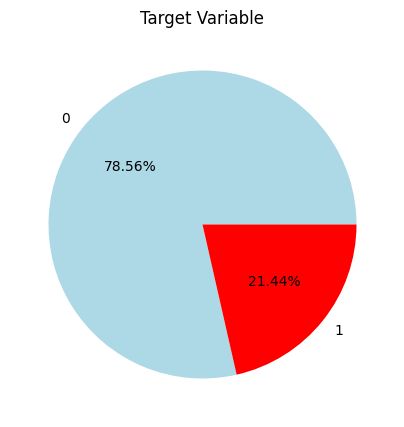

In [10]:
credit_cols = df_loan["credit_risk"].value_counts()
target = df_loan['credit_risk'].value_counts()
label = target.index

plt.figure(figsize=(5, 5))

# Define custom colors for Good and Bad
colors = ['lightblue', 'red']

plt.pie(target, labels=label, autopct='%.2f%%', colors=colors)
print(credit_cols)
plt.title('Target Variable')
plt.show()

Jumlah Good dan Bad sangat jauh dan tetap dipertahankan:

*   persentase Bad masih di atas 20% dan itu masih cukup


# CHECK MISSING VALUE

In [11]:
df_loan.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13390
emp_length                       9156
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           145728
purpose                             0
title                              16
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         132992
mths_since_last_record         208951
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        231
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_d                      376
last_pymnt_amnt                     0
next_pymnt_d                   227214
last_credit_pull_d                 23
collections_12_mths_ex_med        145
mths_since_last_major_derog    195525
policy_code                         0
application_type                    0
annual_inc_joint               237695
dti_joint                      237695
verification_status_joint      237695
acc_now_delinq                     29
tot_coll_amt                    66596
tot_cur_bal                     66596
open_acc_6m                    237695
open_il_6m                     237695
open_il_12m                    237695
open_il_24m                    237695
mths_since_rcnt_il             237695
total_bal_il                   237695
il_util                        237695
open_rv_12m                    237695
open_rv_24m                    237695
max_bal_bc                     237695
all_util                       237695
total_rev_hi_lim                66596
inq_fi                         237695
total_cu_tl                    237695
inq_last_12m                   237695
credit_risk                         0
dtype: int64

In [12]:
null_value = df_loan.isnull().sum()
jumlah_data = len(df_loan)
persentase_null = (null_value / jumlah_data) * 100

null_info = pd.DataFrame({
    'Jumlah Hilang': null_value,
    'Persentase Hilang': persentase_null
})

null_info2 = null_info[null_info['Jumlah Hilang'] > 0].sort_values(by='Persentase Hilang', ascending=False)

jumlah_kolom_hilang = len(null_info2)
print(f"Jumlah kolom yang nilai null:{jumlah_kolom_hilang}")
print("-" * 50)
print(null_info2)

Jumlah kolom yang nilai null:40
--------------------------------------------------
                             Jumlah Hilang  Persentase Hilang
inq_fi                              237695         100.000000
open_rv_24m                         237695         100.000000
max_bal_bc                          237695         100.000000
all_util                            237695         100.000000
inq_last_12m                        237695         100.000000
annual_inc_joint                    237695         100.000000
verification_status_joint           237695         100.000000
dti_joint                           237695         100.000000
total_cu_tl                         237695         100.000000
il_util                             237695         100.000000
mths_since_rcnt_il                  237695         100.000000
total_bal_il                        237695         100.000000
open_il_24m                         237695         100.000000
open_il_12m                         237695       

In [13]:
#CHECK JUMLAH DATA "df_loan" DAN "df_without_label"
df1 = df_loan.shape,
df2 = df_without_label.shape

df_info = {
    'df_loan': df1,
    'df_without_label': df2}
print(df_info)

{'df_loan': ((237695, 75),), 'df_without_label': (228590, 74)}


In [14]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237695 entries, 0 to 466283
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    224305 non-null  object 
 12  emp_length                   228539 non-null  object 
 13  home

# CHECK DUPLICATE

In [15]:
df_loan.duplicated().sum()

np.int64(0)

In [16]:
# Cara sederhana menggunakan select_dtypes untuk langsung memilih kolom berdasarkan tipenya
kolom_numerik = df_loan.select_dtypes(include=np.number).columns.tolist()
kolom_kategorikal = df_loan.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

print(f"Kolom Numerik ({len(kolom_numerik)} kolom):")
print(kolom_numerik)
print(f"Kolom Kategorikal ({len(kolom_kategorikal)} kolom):")
print(kolom_kategorikal)


Kolom Numerik (54 kolom):
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'credit_risk']
Kolom Kategorikal (21 kolom):
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 

# UNIVARIATE ANALYSIS

## KOLOM KATEGORIKAL

term
36 months    185700
60 months     51995
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


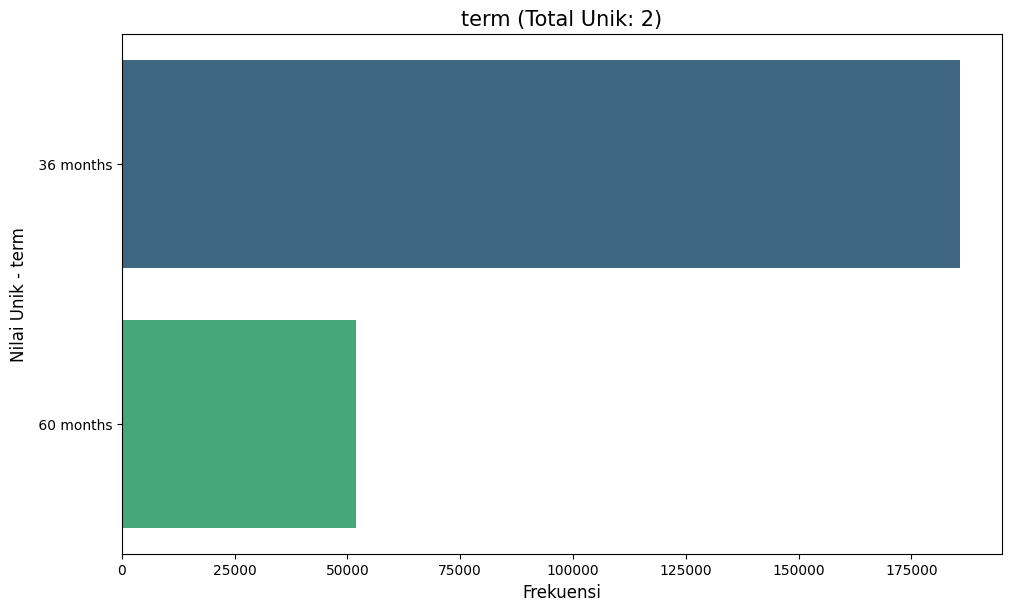

grade
B    71990
C    60683
A    39442
D    38431
E    17911
F     7273
G     1965
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


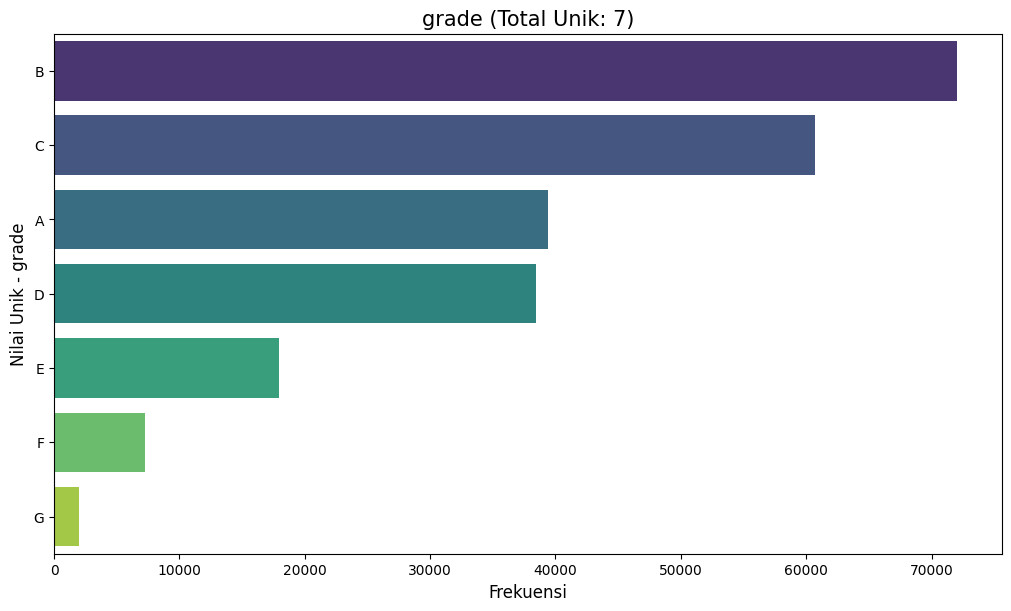

sub_grade
B3    17316
B4    16057
C1    13950
B2    13874
B5    13368
C2    13305
C3    11851
B1    11375
C4    11144
A5    11074
C5    10433
A4    10370
D1     9475
D2     8645
D3     7565
D4     6990
A3     6746
A2     5758
D5     5756
A1     5494
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


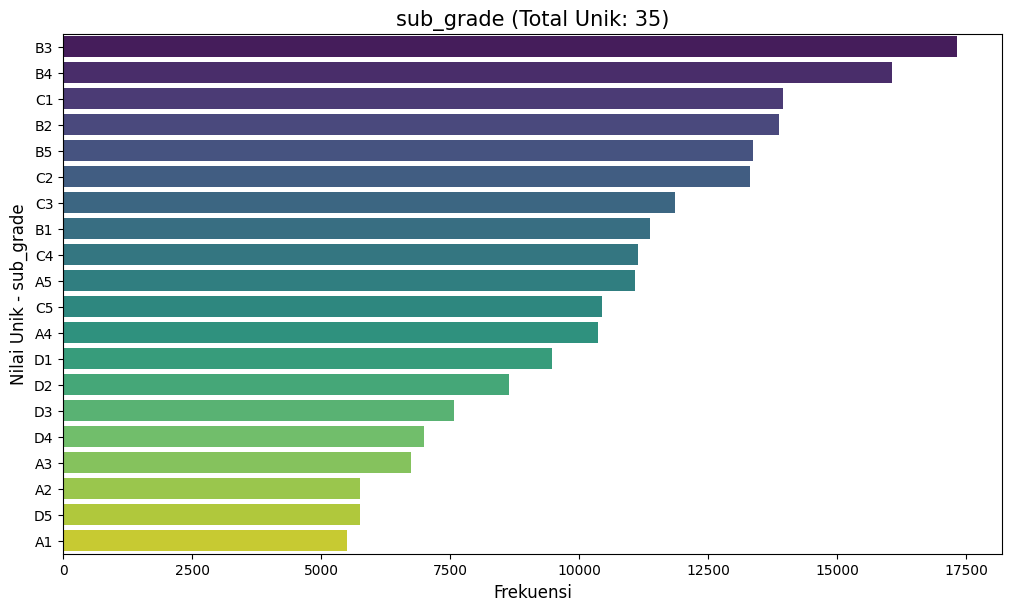

emp_title
Teacher             1633
Manager             1597
RN                   712
Registered Nurse     708
Supervisor           703
Project Manager      555
Sales                550
manager              481
US Army              470
Office Manager       462
Driver               450
Director             401
Engineer             367
General Manager      365
Bank of America      357
Owner                348
teacher              339
driver               328
Accountant           301
Vice President       295
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


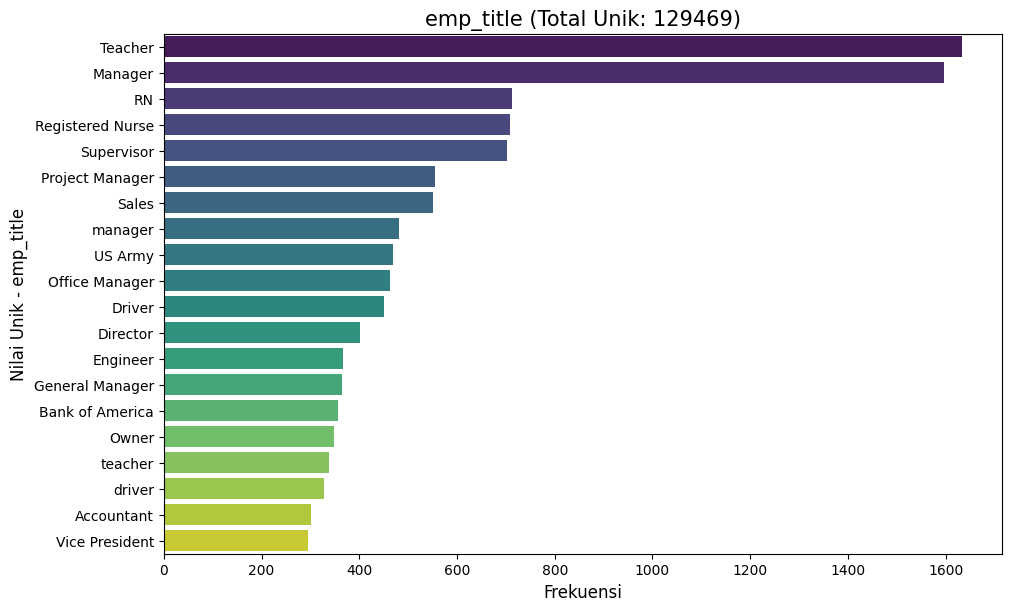

emp_length
10+ years    70939
2 years      22246
< 1 year     19886
3 years      19295
5 years      17224
1 year       16006
4 years      15322
6 years      14242
7 years      13402
8 years      11042
9 years       8935
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


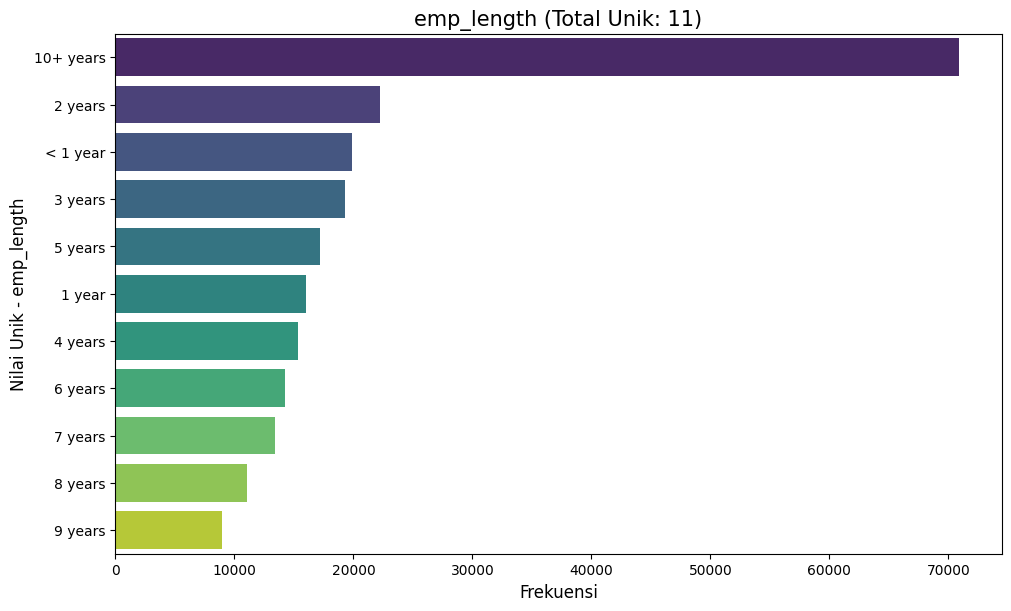

home_ownership
MORTGAGE    116769
RENT        100703
OWN          19995
OTHER          179
NONE            48
ANY              1
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


verification_status
Verified           88337
Not Verified       82760
Source Verified    66598
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


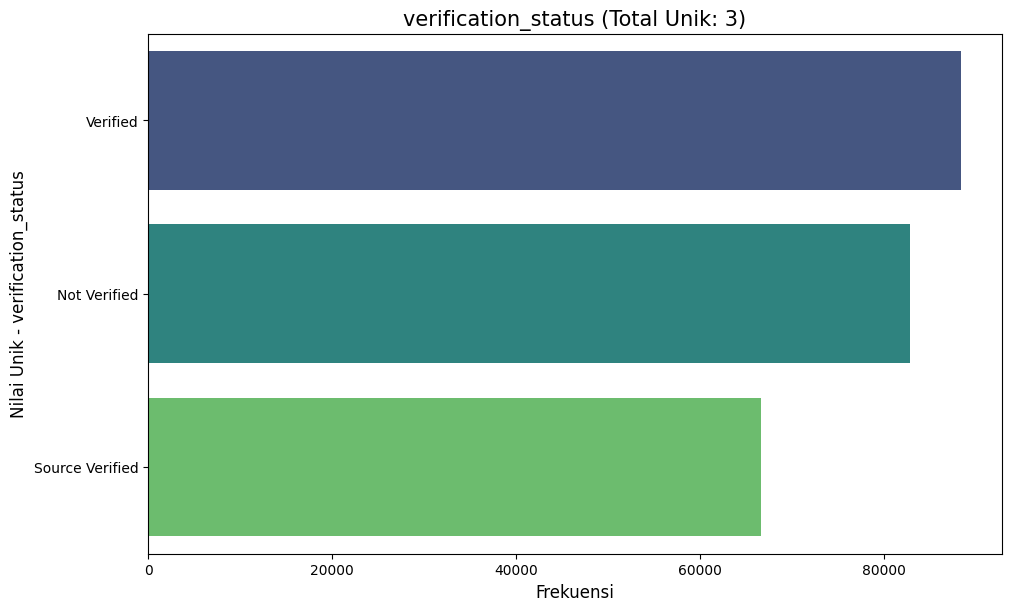

issue_d
Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
Oct-13    6876
May-14    6825
Jan-14    6818
Aug-13    6569
Sep-13    6542
Mar-14    6507
Jul-13    6325
Jun-13    6153
Feb-14    6148
May-13    6023
Nov-12    5915
Oct-12    5868
Jun-14    5747
Sep-12    5705
Apr-13    5676
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


pymnt_plan
n    237689
y         6
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


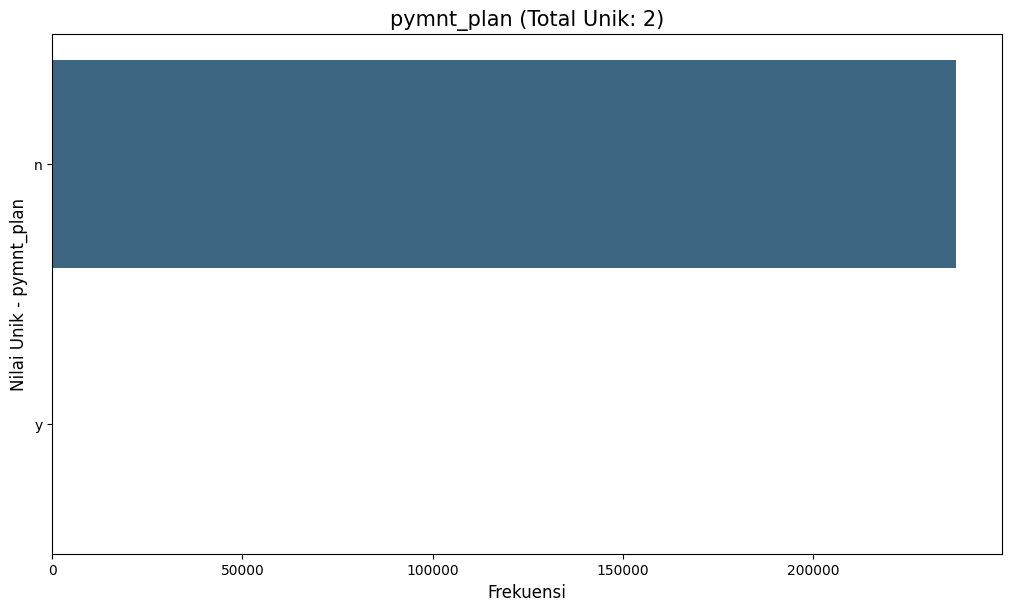

url
https://www.lendingclub.com/browse/loanDetail.action?loan_id=9604874    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071795    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071570    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1070078    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069908    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1064687    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069866    1
https://www.lendingclub.com/browse

/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


desc
                                                                              230
Debt Consolidation                                                             13
Camping Membership                                                              8
  Borrower added on 03/10/14 > Debt consolidation<br>                           6
refinancing                                                                     5
  Borrower added on 03/17/14 > Debt consolidation<br>                           5
  Borrower added on 01/03/14 > Debt consolidation<br>                           5
  Borrower added on 10/05/12 > Debt consolidation<br>                           4
  Borrower added on 12/02/13 > Debt consolidation<br>                           4
  Borrower added on 03/13/14 > Debt consolidation<br>                           4
  Borrower added on 02/27/14 > Debt consolidation<br>                           4
  Borrower added on 12/16/13 > Debt consolidation<br>                           4
  Borrower 

/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


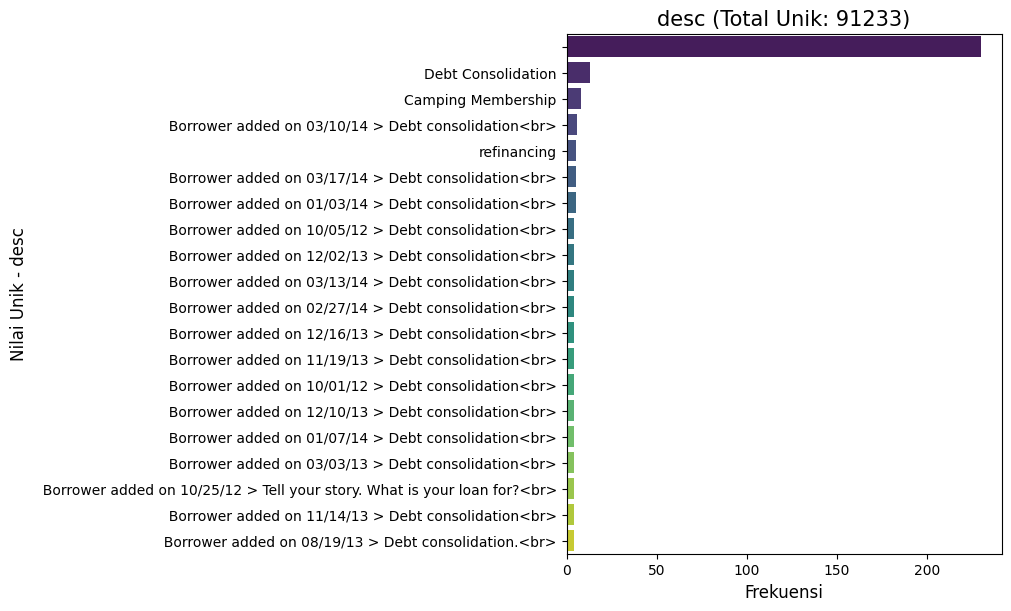

purpose
debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


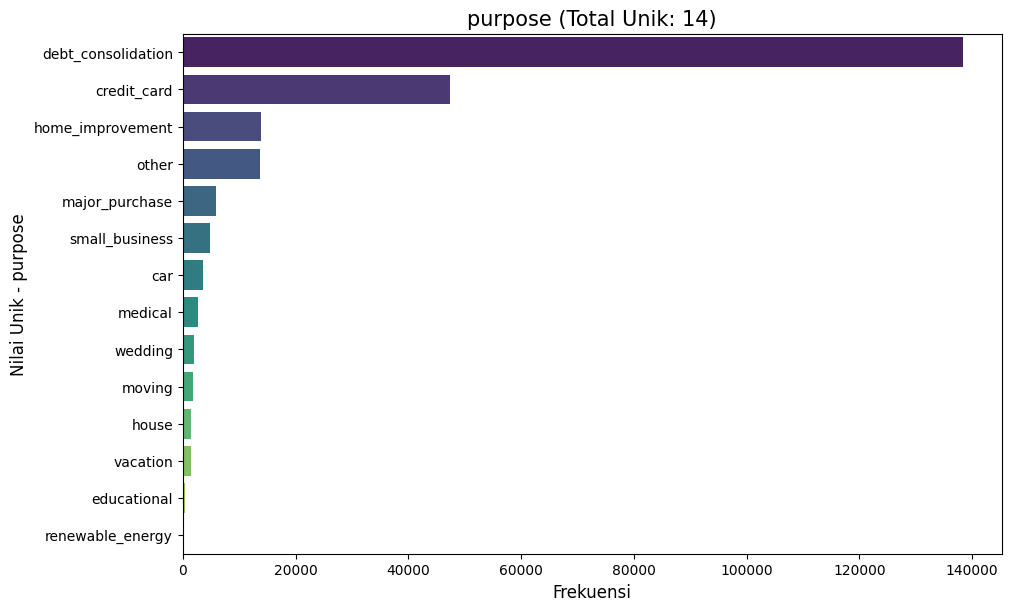

title
Debt consolidation           59800
Credit card refinancing      19424
Debt Consolidation           11310
Home improvement              5318
Other                         4877
Consolidation                 3645
debt consolidation            3306
Debt Consolidation Loan       3108
Major purchase                1704
Personal Loan                 1674
Credit Card Consolidation     1653
Business                      1591
consolidation                 1417
Home Improvement              1270
Consolidation Loan            1222
Medical expenses              1154
Credit Card Refinance          987
Credit Card Payoff             904
Personal                       886
Consolidate                    855
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


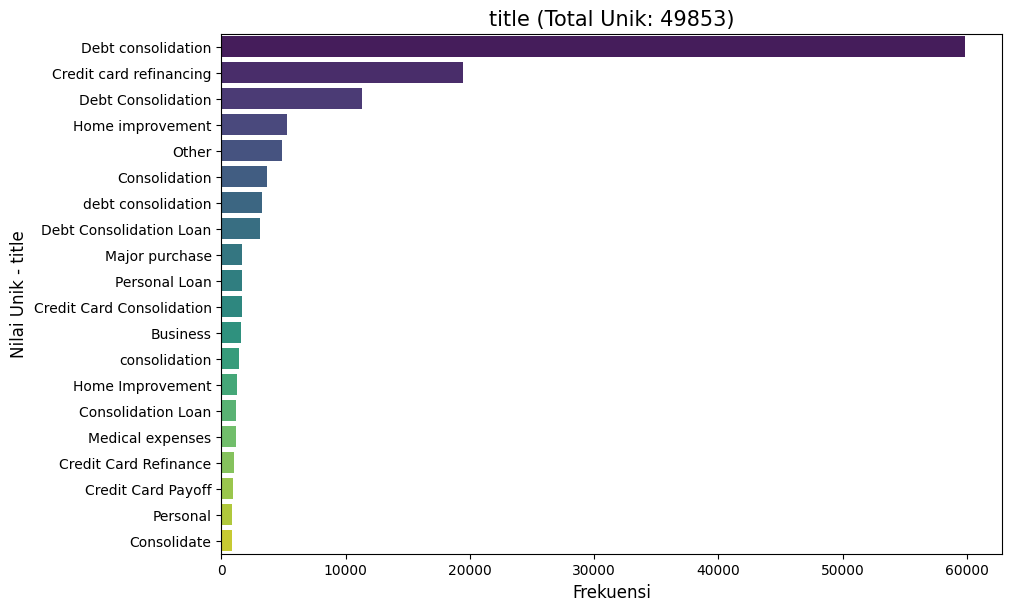

zip_code
945xx    3044
112xx    2737
750xx    2588
100xx    2434
900xx    2355
606xx    2345
331xx    2163
300xx    2143
070xx    2108
917xx    1967
770xx    1854
921xx    1853
891xx    1814
926xx    1756
330xx    1742
104xx    1604
117xx    1577
913xx    1567
852xx    1539
925xx    1478
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


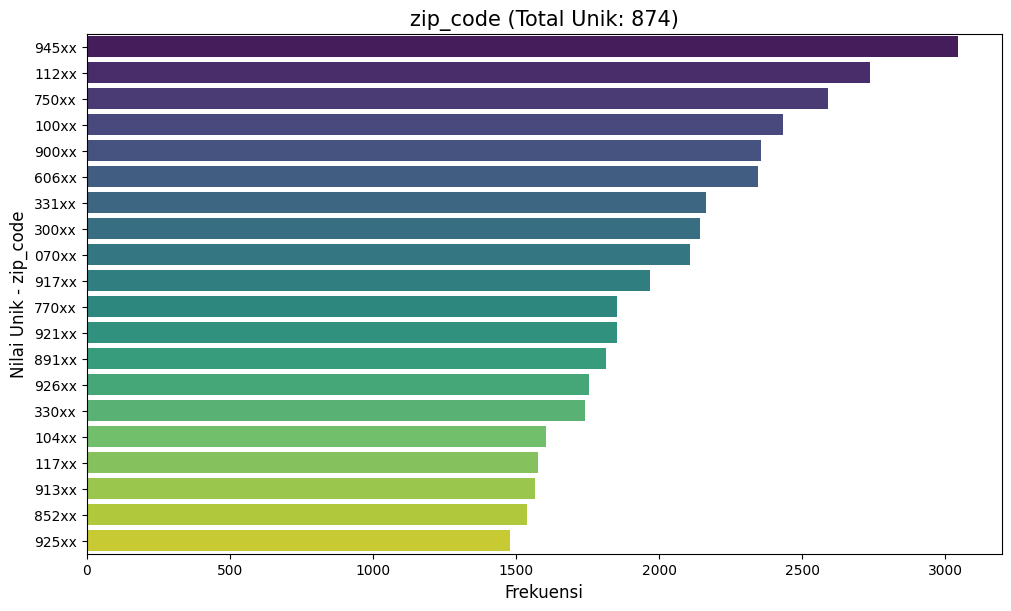

addr_state
CA    40386
NY    20485
TX    18061
FL    16569
NJ     9187
IL     8777
PA     8014
GA     7533
VA     7498
OH     7296
NC     6422
MA     5889
AZ     5662
MD     5651
MI     5540
WA     5466
CO     5160
MN     4107
MO     3773
NV     3545
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


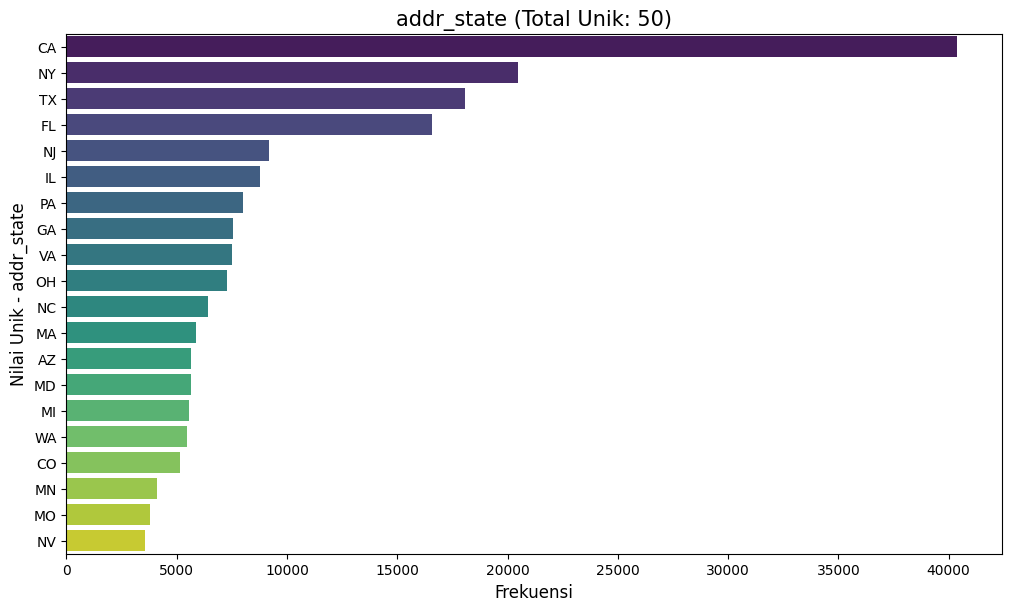

earliest_cr_line
Oct-00    2027
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
Aug-00    1806
Dec-00    1669
Sep-00    1665
Aug-01    1662
Dec-98    1649
Dec-99    1639
Sep-01    1606
Oct-02    1589
Nov-98    1582
Sep-99    1565
Oct-98    1562
Aug-99    1557
Jan-01    1550
Jul-00    1523
Jan-00    1514
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


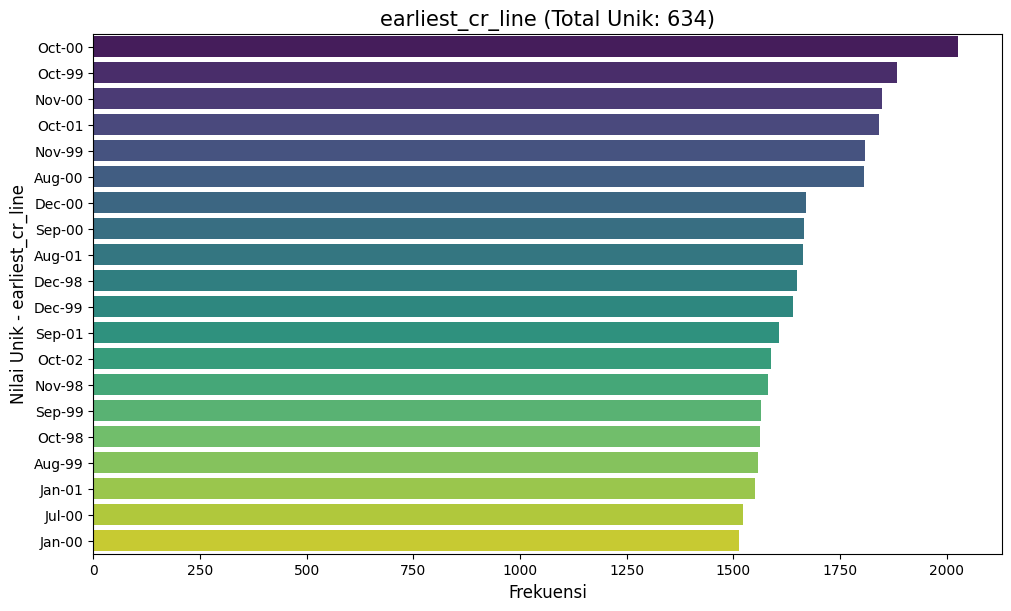

initial_list_status
f    177046
w     60649
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


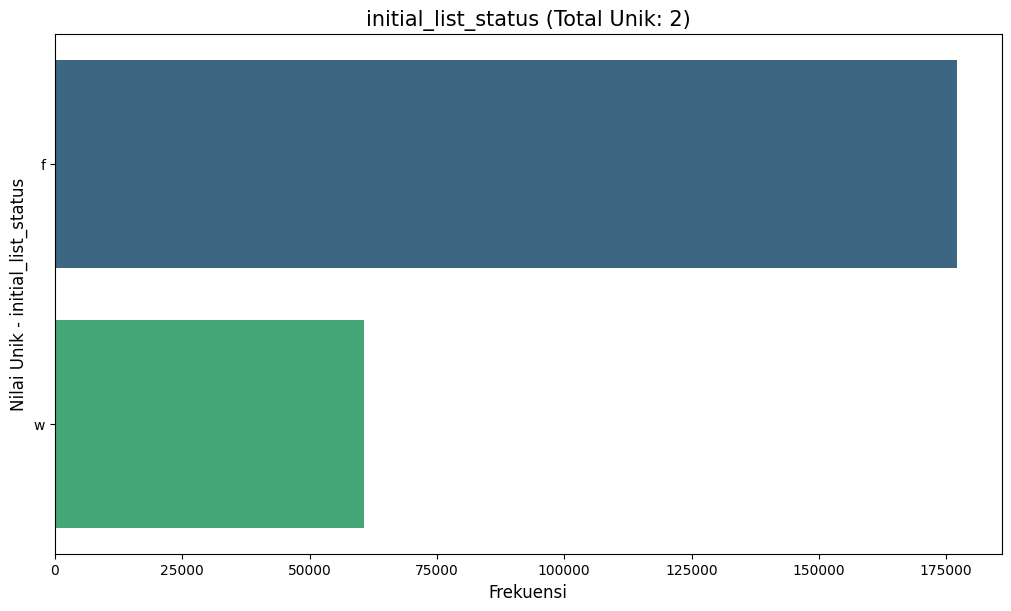

last_pymnt_d
Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9939
May-15     9618
Nov-15     9280
Dec-15     9010
Jan-15     8611
Feb-15     8488
Oct-14     7676
Dec-14     7253
Sep-14     6316
Jul-14     6312
Aug-14     6305
Nov-14     6206
Jun-14     5620
May-14     4721
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


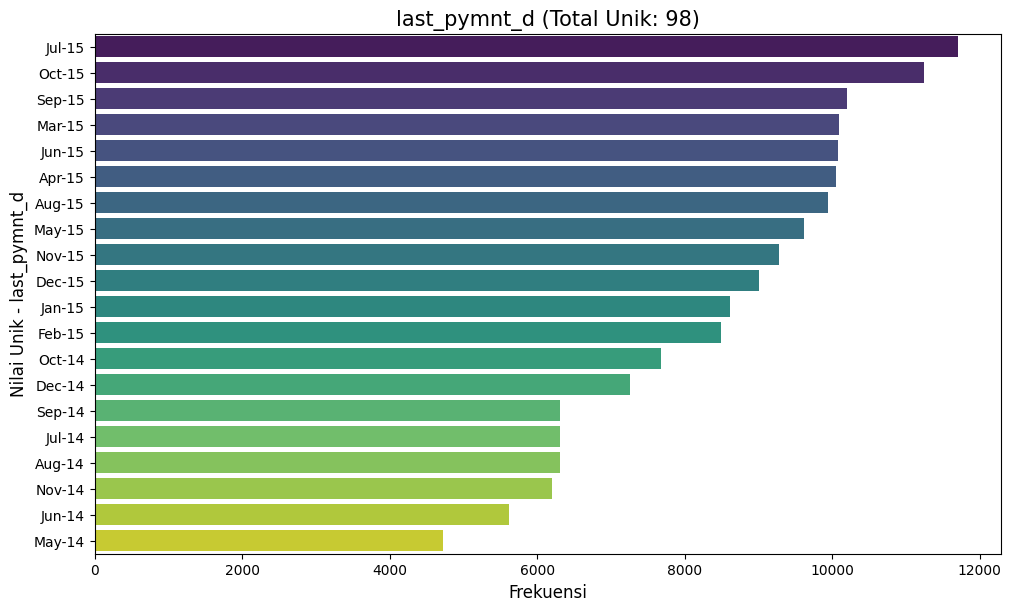

next_pymnt_d
Feb-16    6845
Jan-16     897
Mar-11     107
Apr-11     101
Feb-11      91
Jan-11      79
May-11      77
Dec-10      71
Jun-11      66
Sep-11      63
Aug-11      57
Nov-10      55
Aug-10      54
Jul-11      53
Sep-10      53
Oct-09      53
Dec-09      53
Nov-09      52
Dec-08      51
Apr-12      49
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


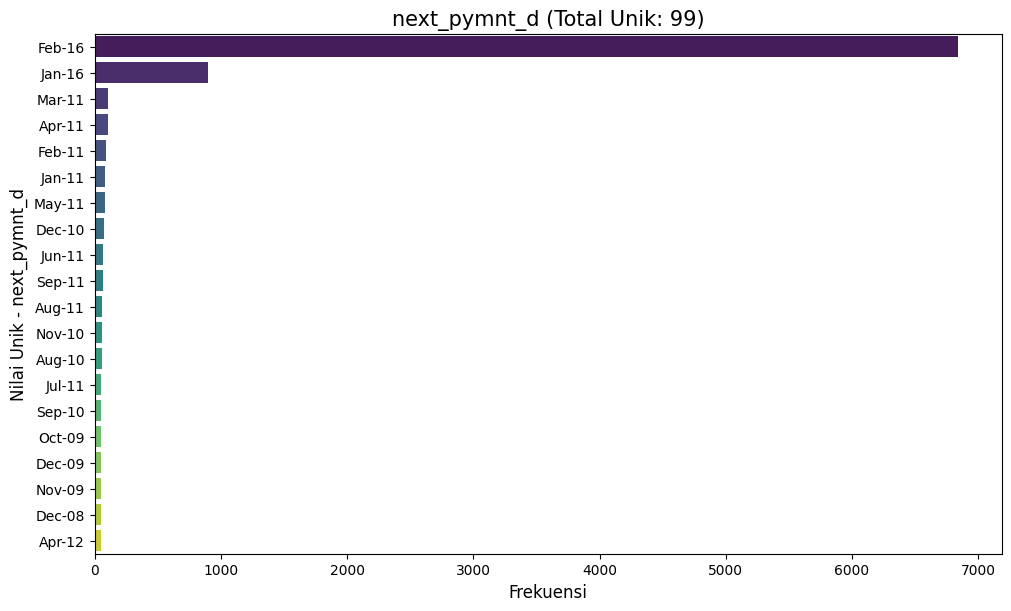

last_credit_pull_d
Jan-16    100480
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
Jul-15      7282
Aug-15      6521
Jun-15      6159
Apr-15      5661
Mar-15      5444
May-15      5309
Feb-15      4790
Jan-15      4753
Dec-14      3681
Oct-14      3346
Nov-14      3158
Sep-14      2957
Aug-14      2807
Jul-14      2768
May-14      2289
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


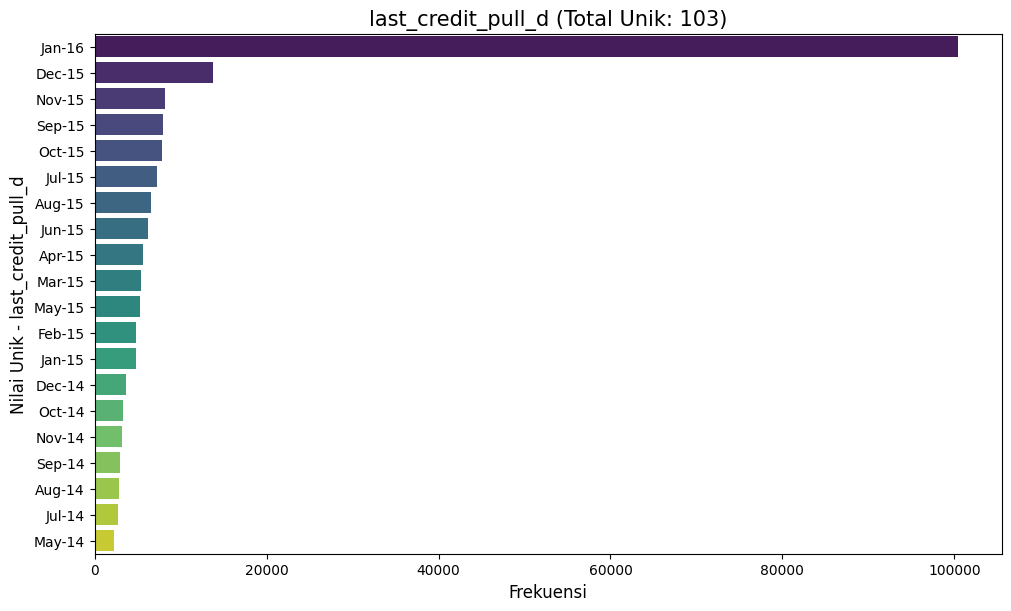

application_type
INDIVIDUAL    237695
Name: count, dtype: int64


/tmp/ipython-input-17-2369828056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')


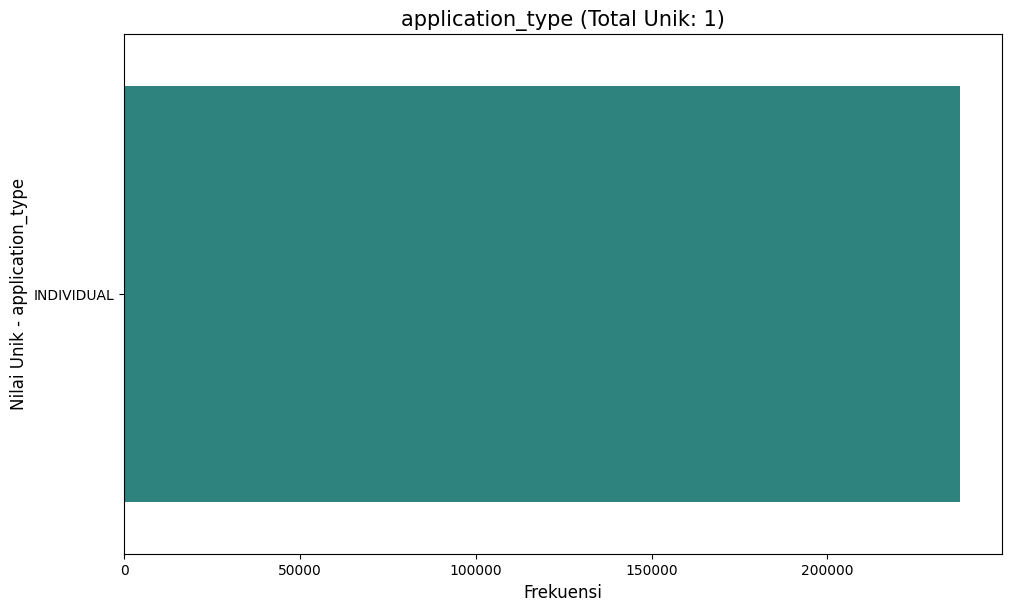

In [17]:
for column in kolom_kategorikal:
    print(df_loan[column].value_counts().nlargest(20))
    jumlah_kategori_unik = df_loan[column].nunique()
    plt.figure(figsize=(10, 6), layout='constrained')
    top_20 = df_loan[column].value_counts().nlargest(20).index
    sns.countplot(y=column, data=df_loan[df_loan[column].isin(top_20)], order=top_20, palette='viridis')
    plt.title(f'{column} (Total Unik: {jumlah_kategori_unik})', fontsize=15)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel(f'Nilai Unik - {column}', fontsize=12)

    plt.show()

## KOLOM NUMERIK

Membuat histogram untuk setiap kolom numerik...


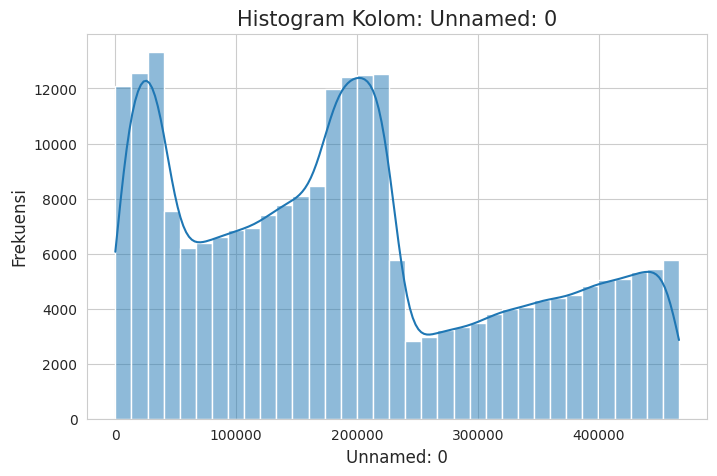

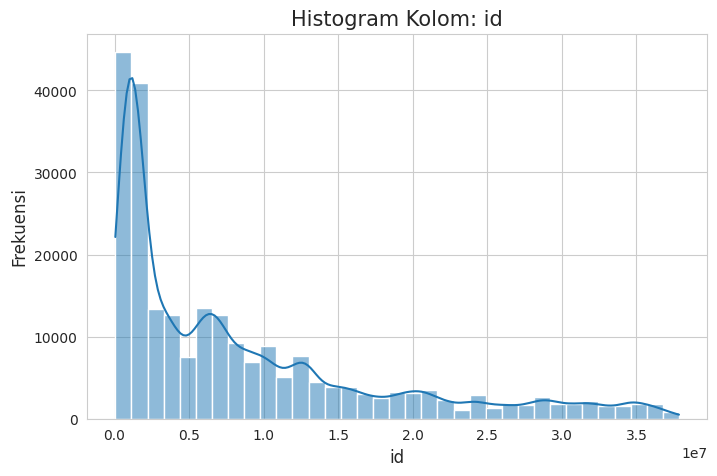

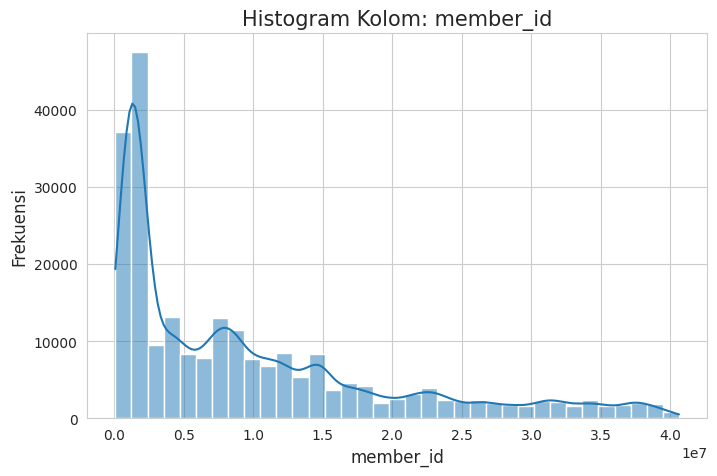

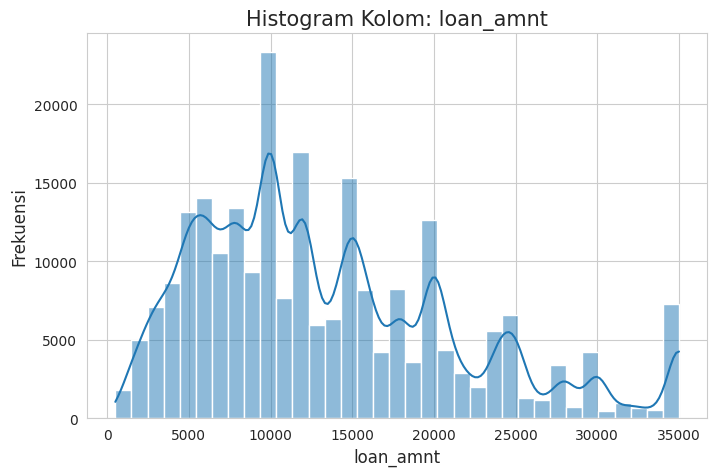

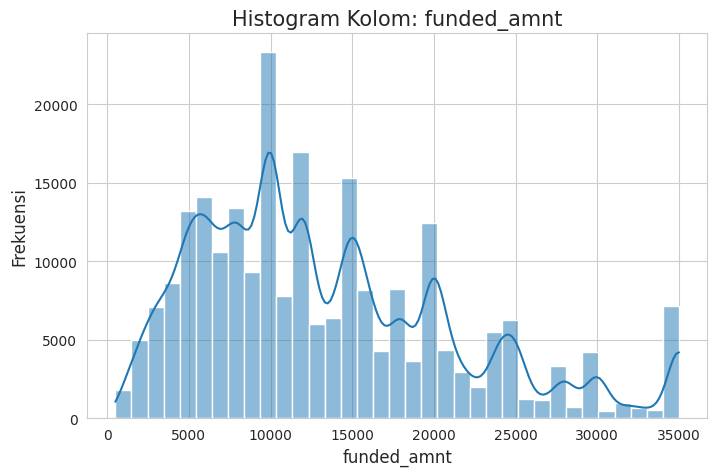

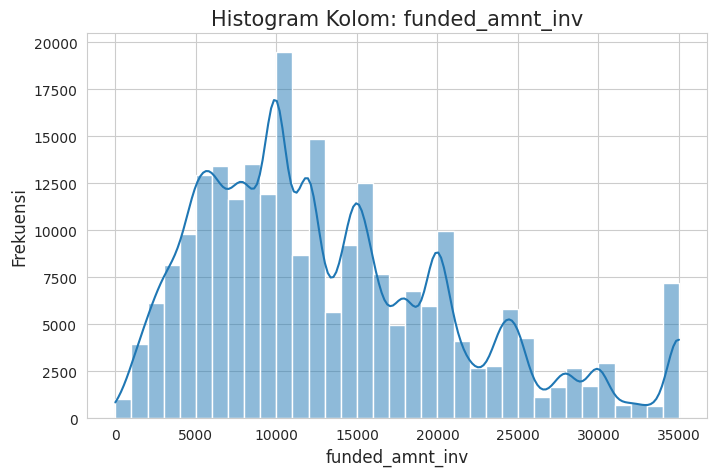

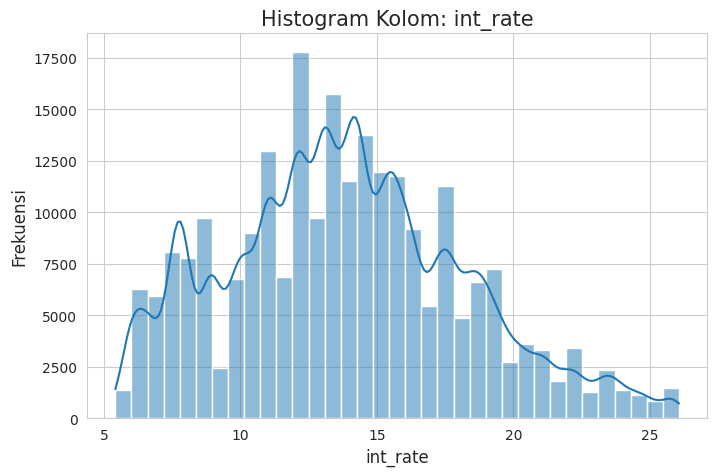

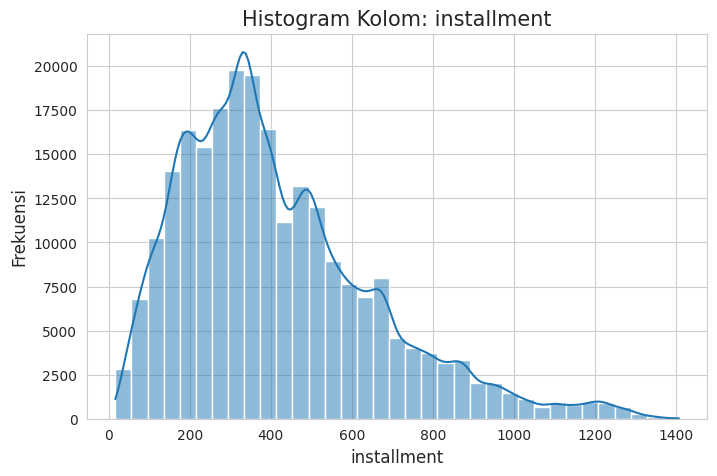

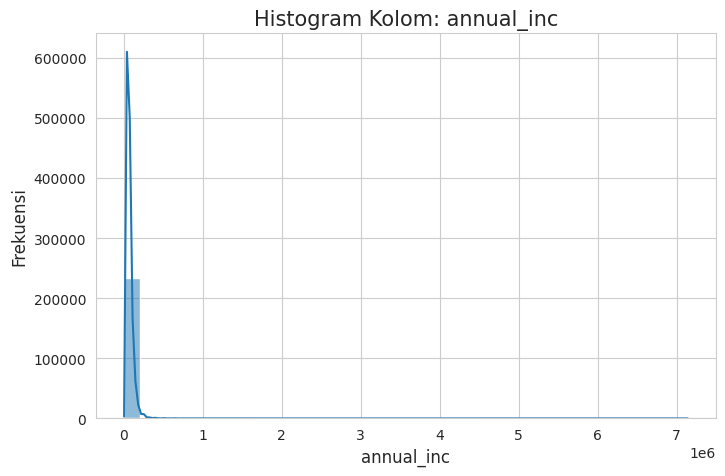

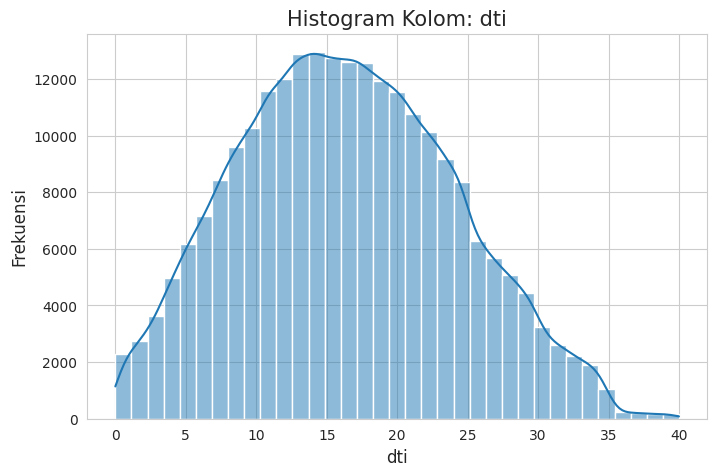

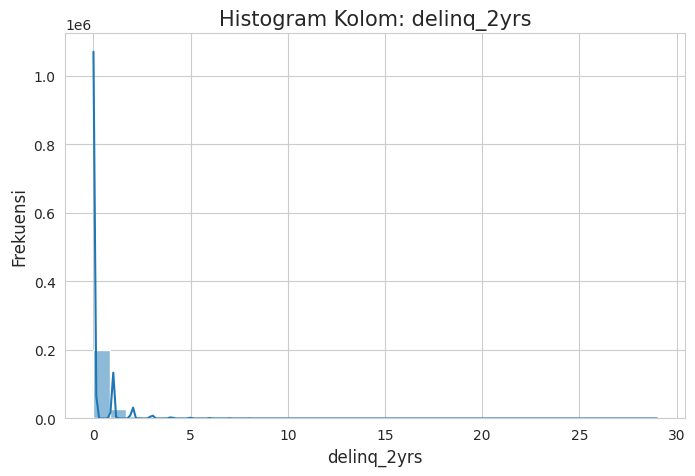

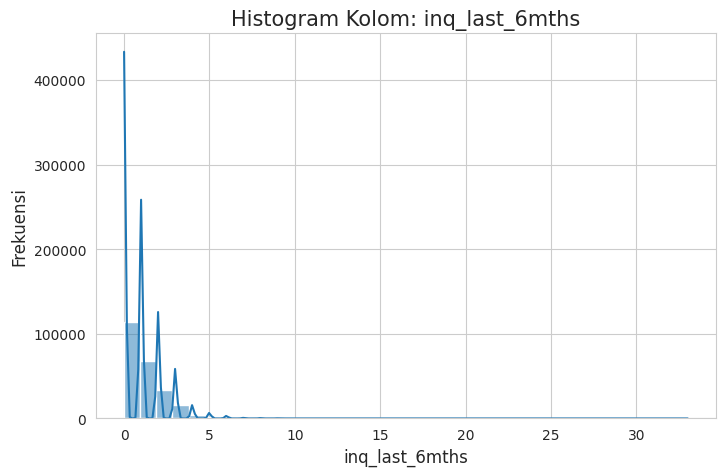

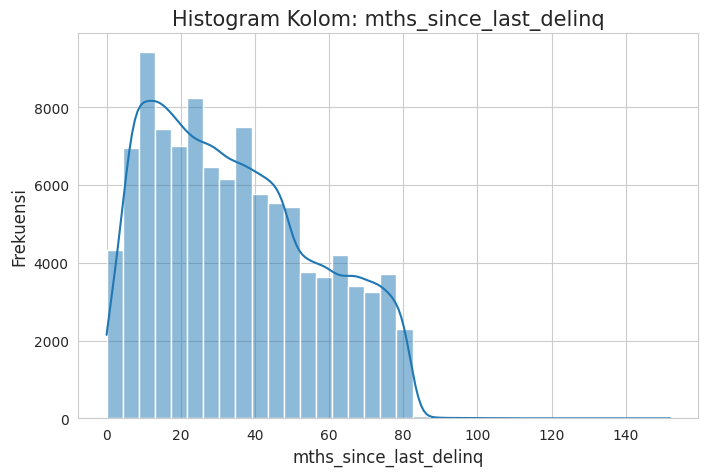

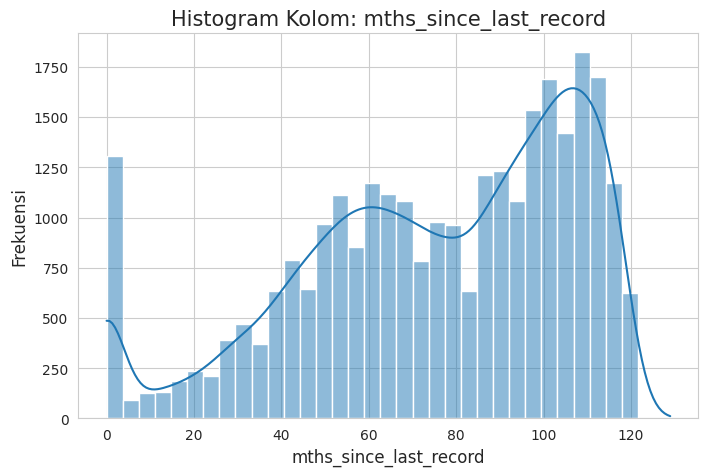

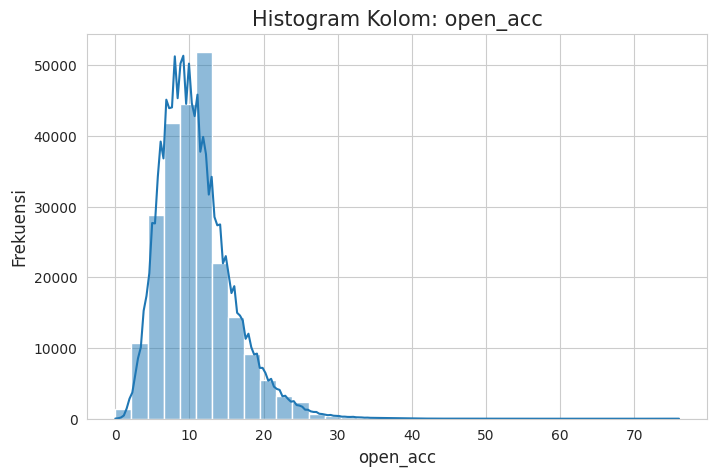

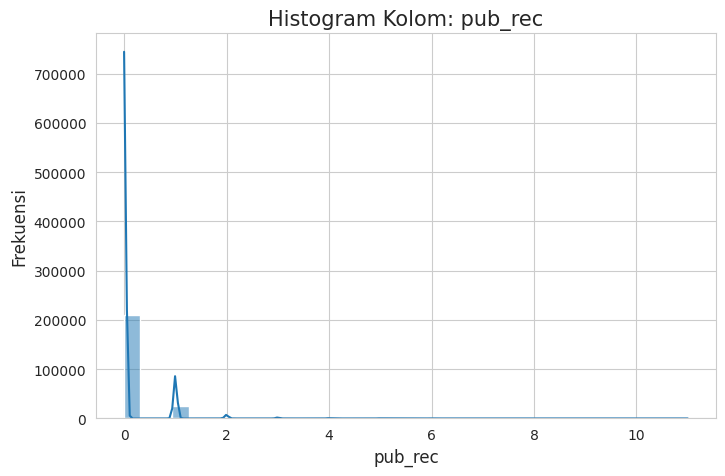

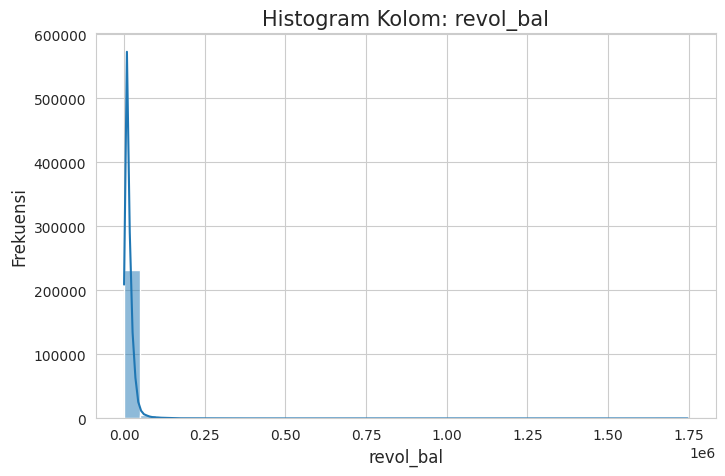

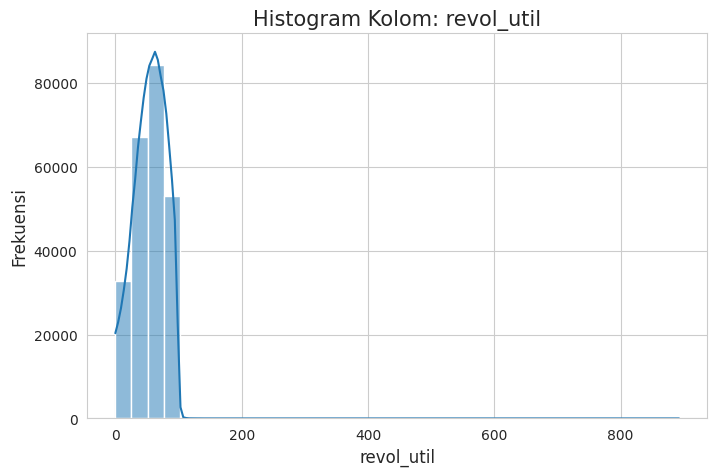

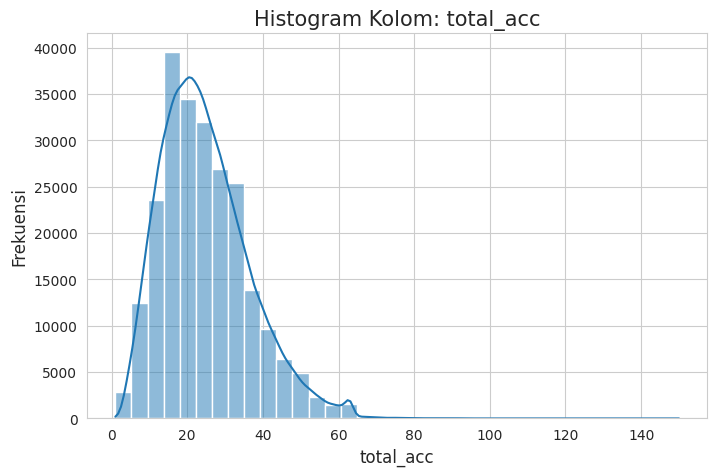

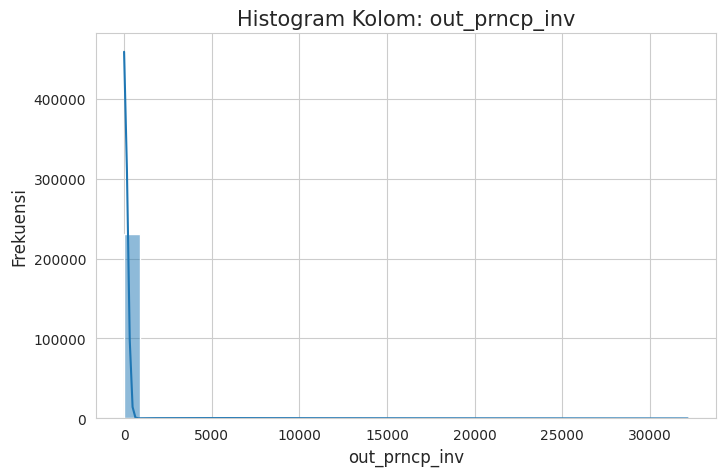

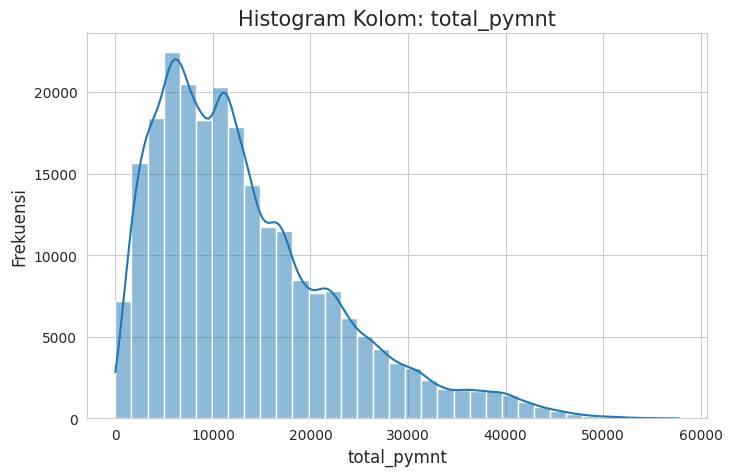

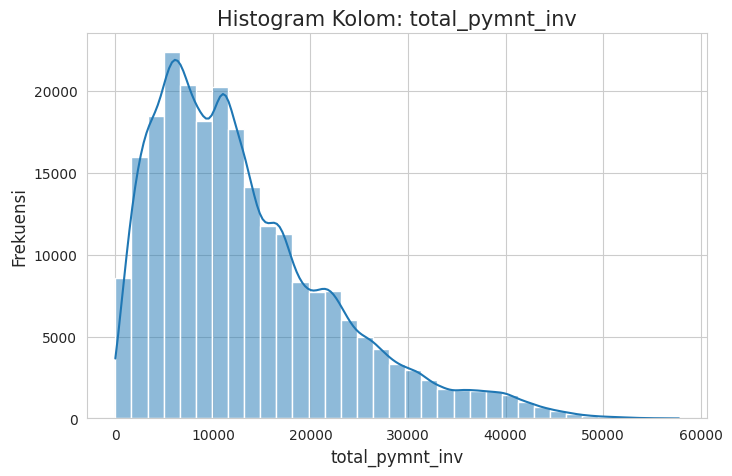

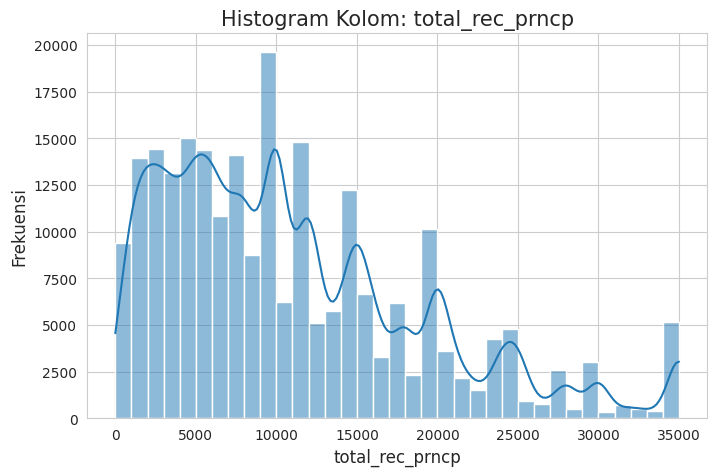

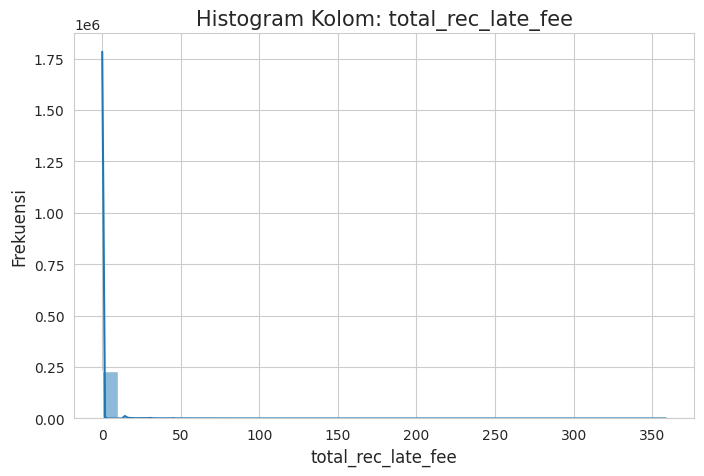

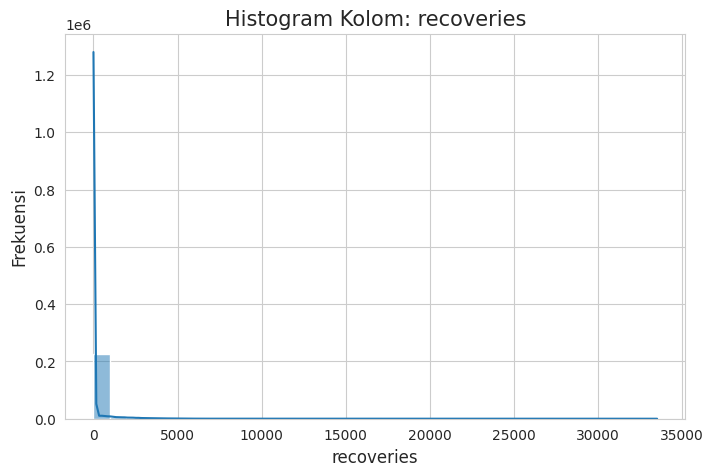

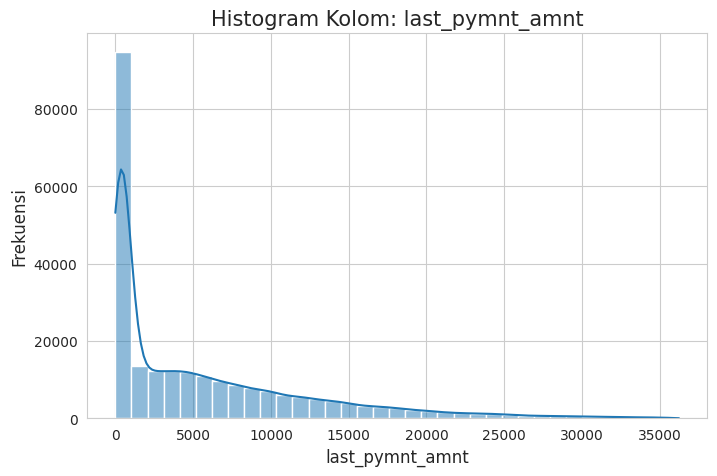

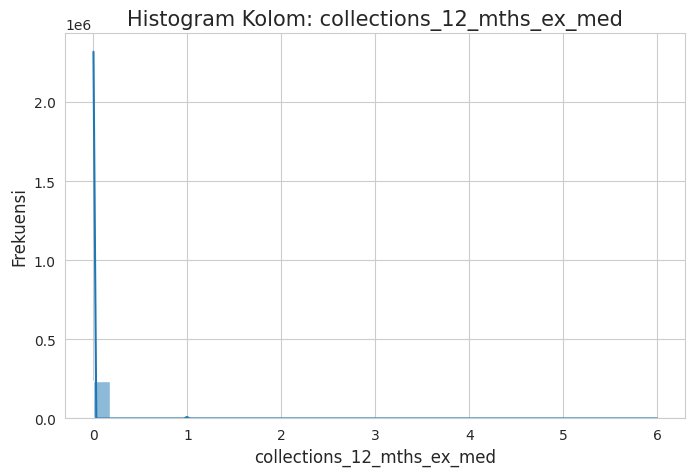

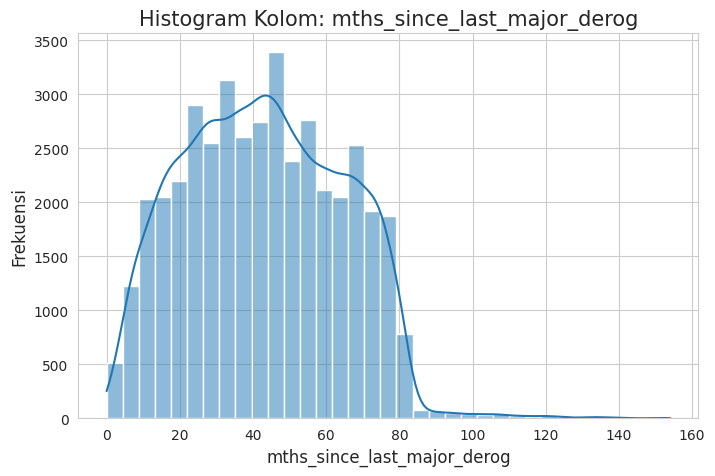

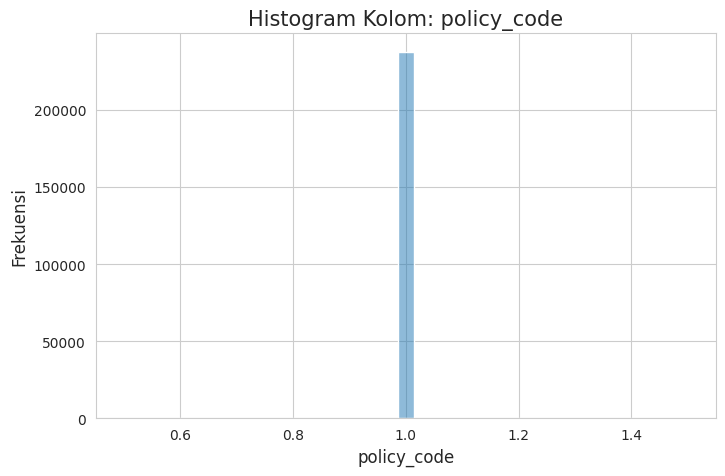

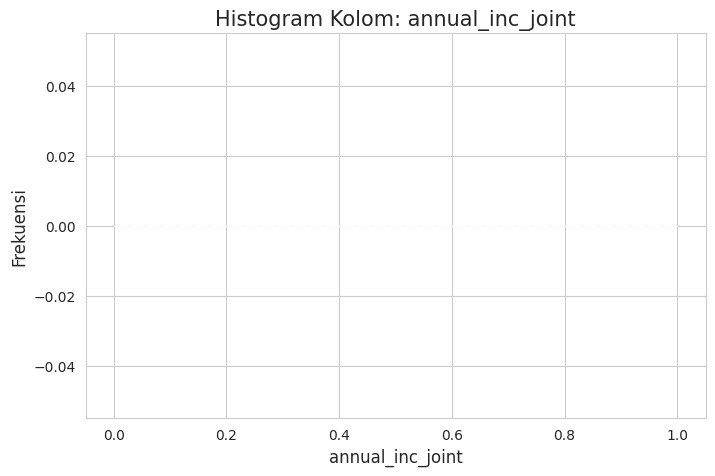

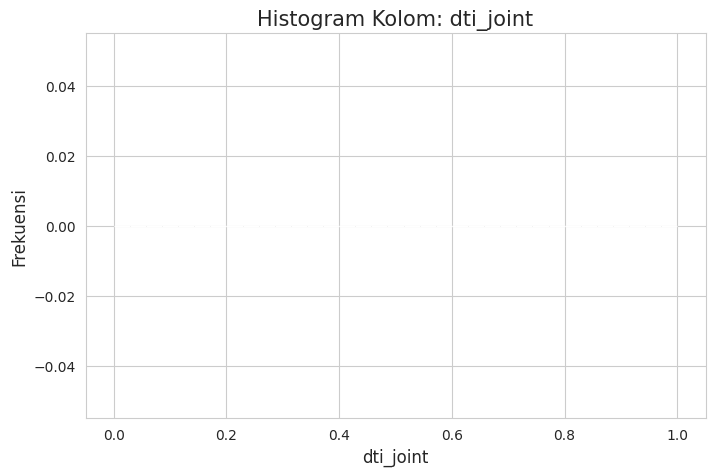

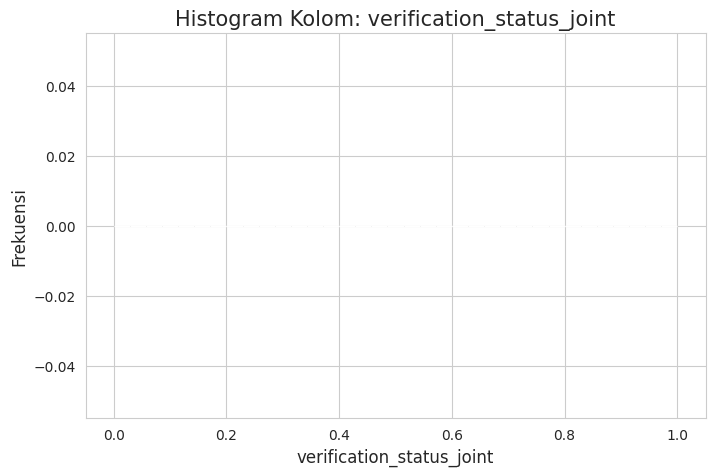

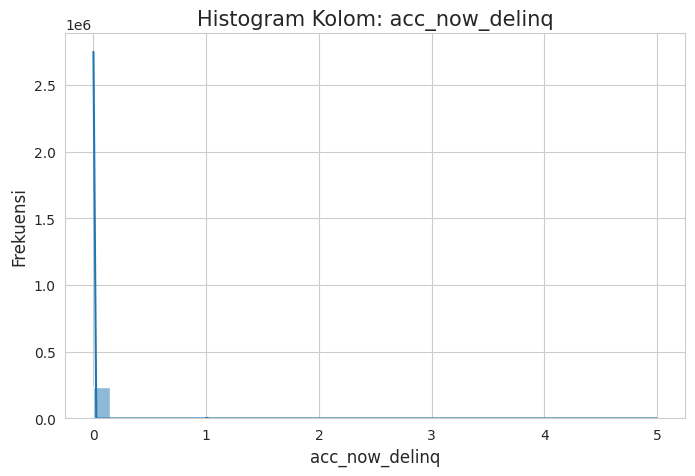

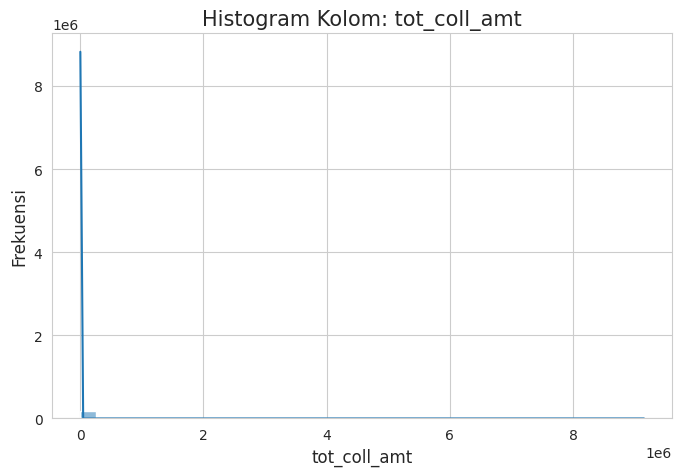

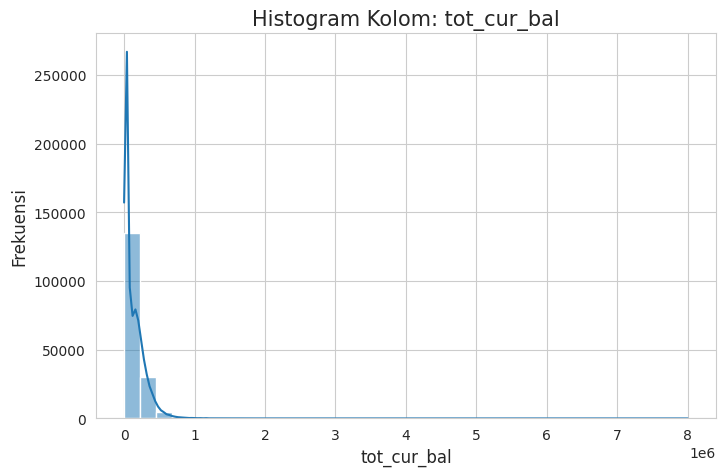

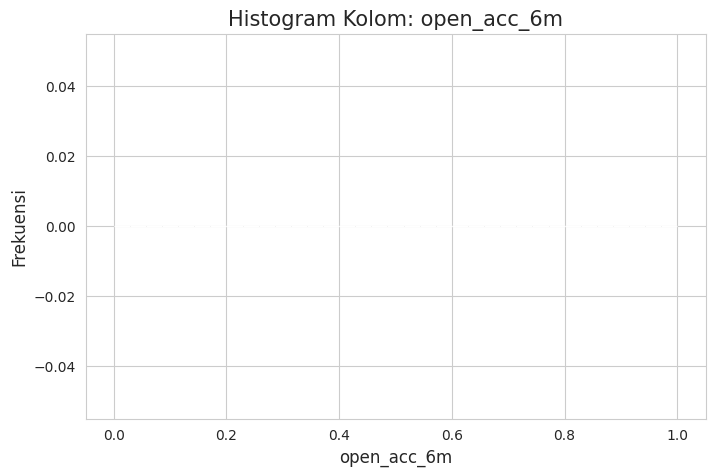

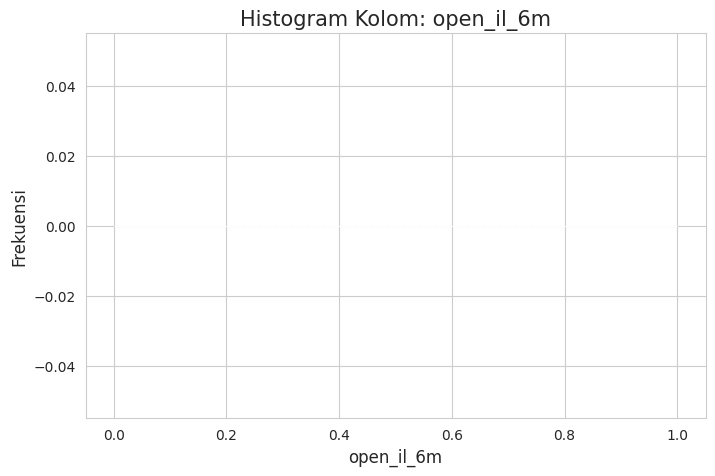

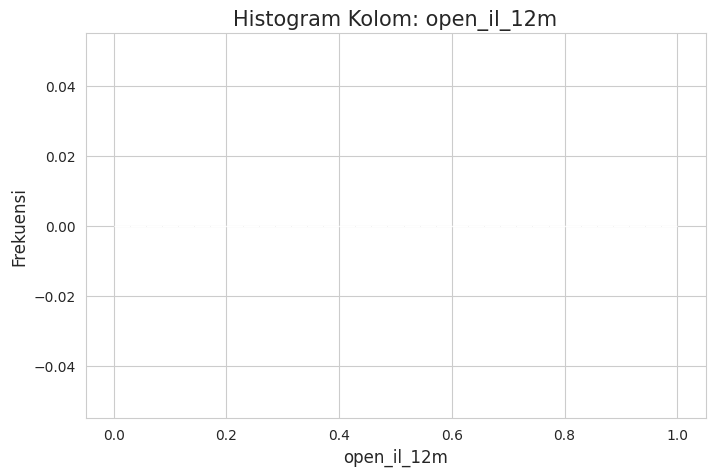

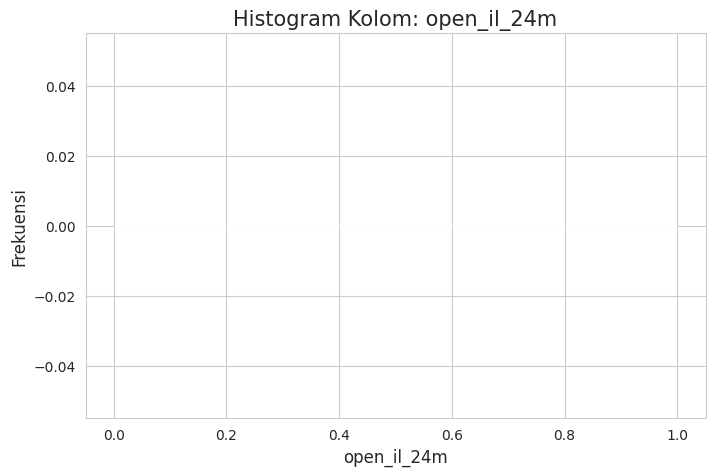

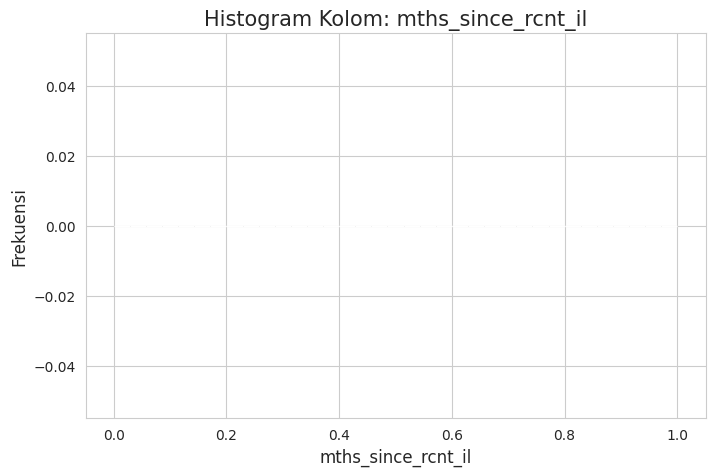

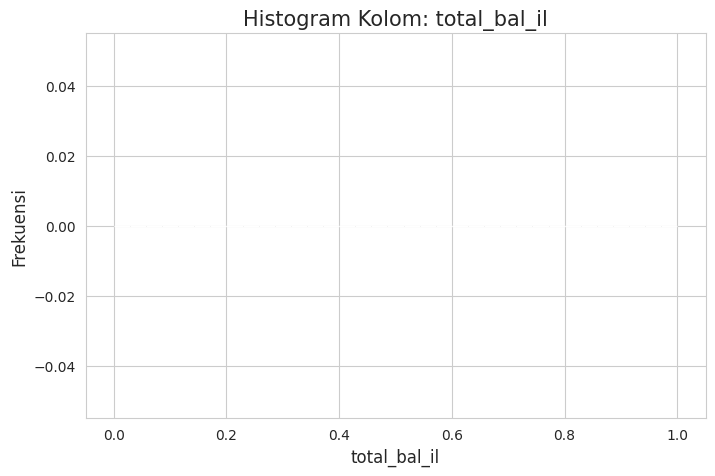

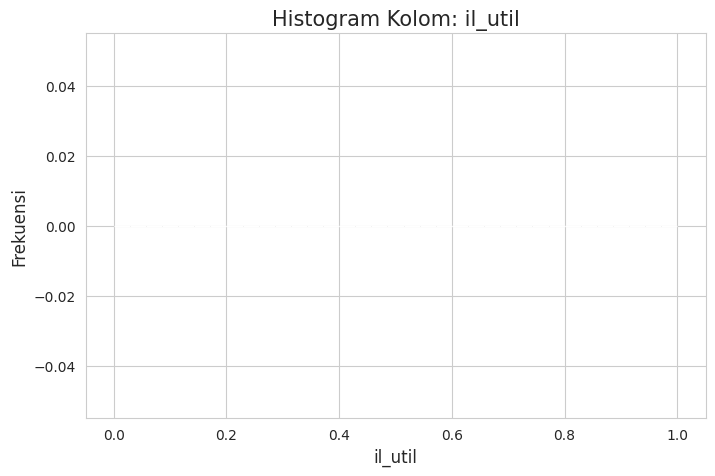

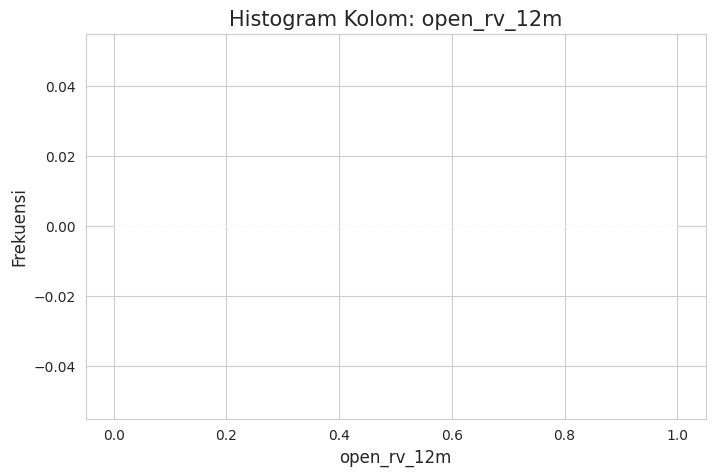

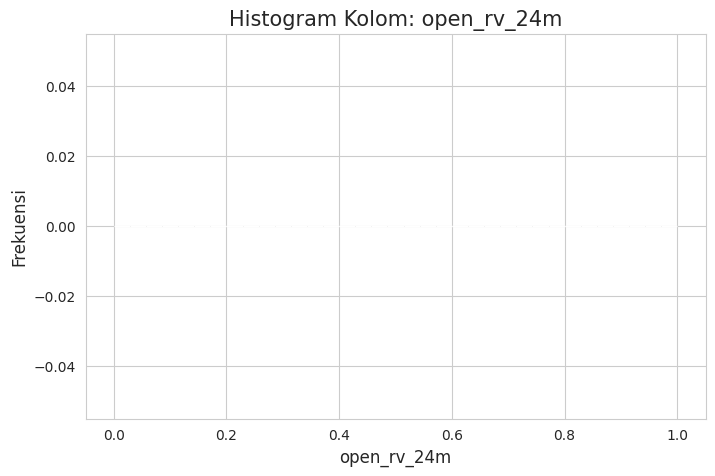

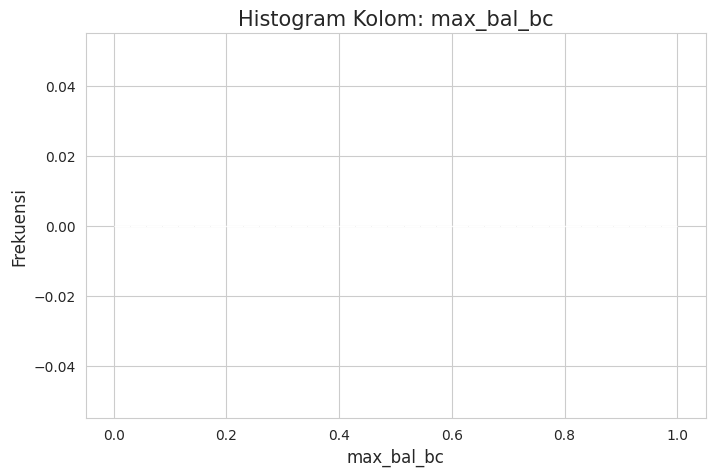

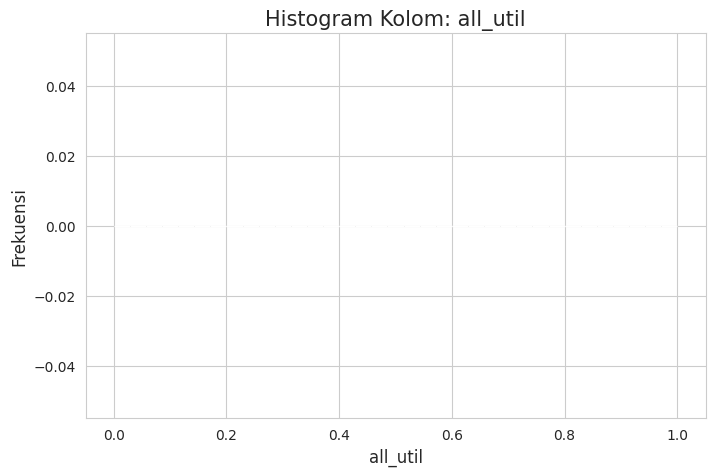

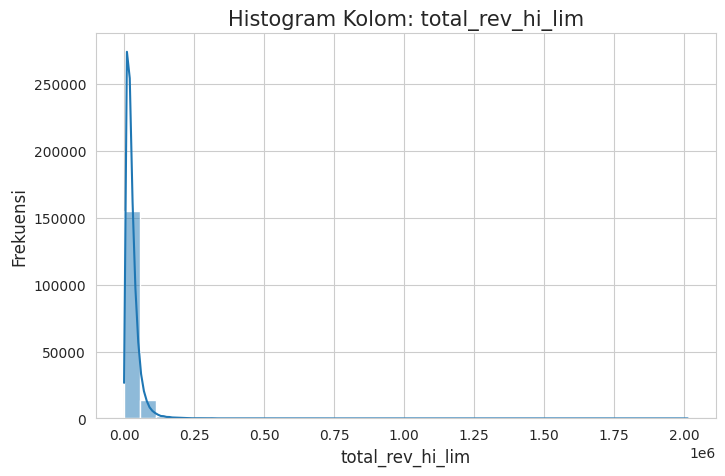

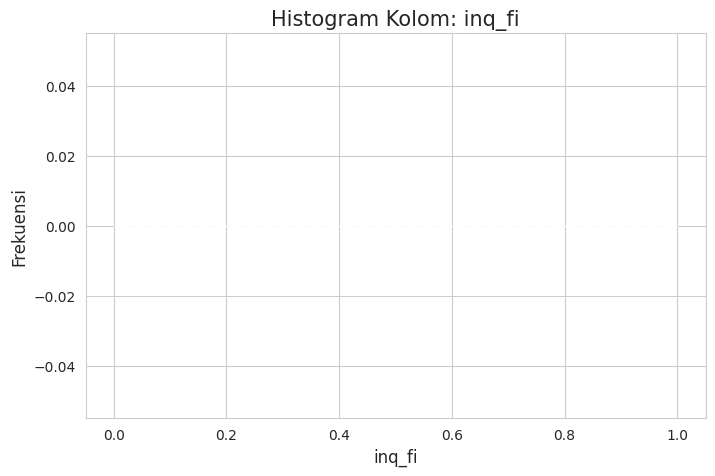

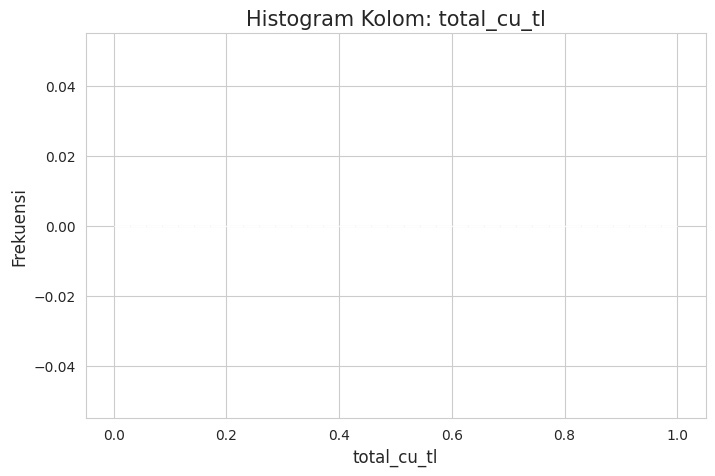

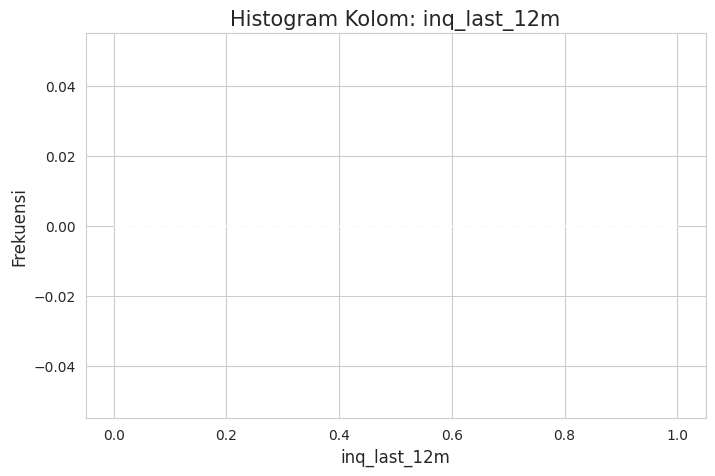

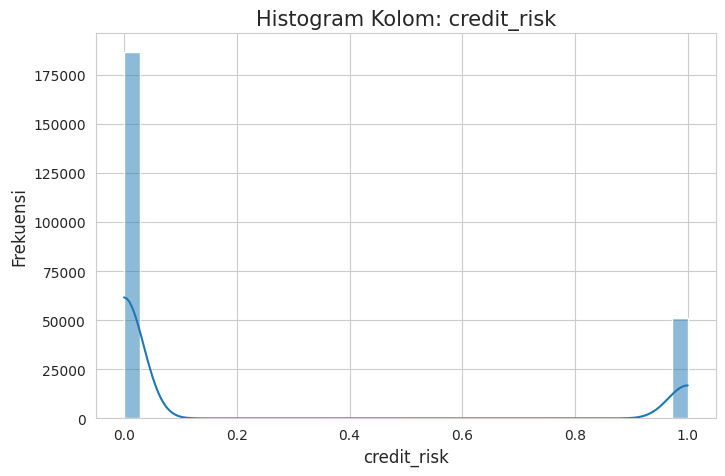

In [18]:
sns.set_style('whitegrid')

print("Membuat histogram untuk setiap kolom numerik...")

# Loop melalui setiap nama kolom dalam list 'kolom_numerik'
for column in kolom_numerik:
    # Membuat canvas (figure) baru untuk setiap histogram agar tidak tumpang tindih
    plt.figure(figsize=(8, 5))

    # Membuat histogram menggunakan seaborn.
    # kde=True menambahkan garis estimasi kepadatan untuk melihat bentuk distribusi.
    sns.histplot(df_loan[column], kde=True, bins=35)

    # Menambahkan judul yang informatif pada plot
    plt.title(f'Histogram Kolom: {column}', fontsize=15)

    # Menambahkan label untuk sumbu x dan y
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    # Menampilkan plot
    plt.show()

# BIVARIATE ANALYSIS

## Kategorikal

### sub grade vs credit risk

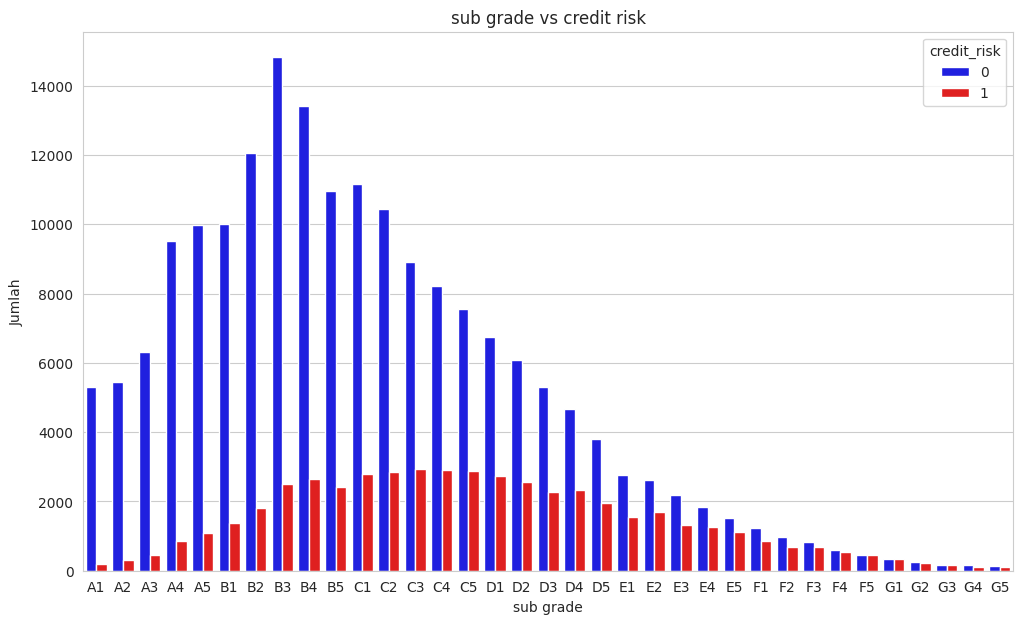

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(x='sub_grade', data=df_loan, order=sorted(df_loan['sub_grade'].unique()), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('sub grade vs credit risk')
plt.xlabel('sub grade')
plt.ylabel('Jumlah')
plt.show()

### term vs credit risk

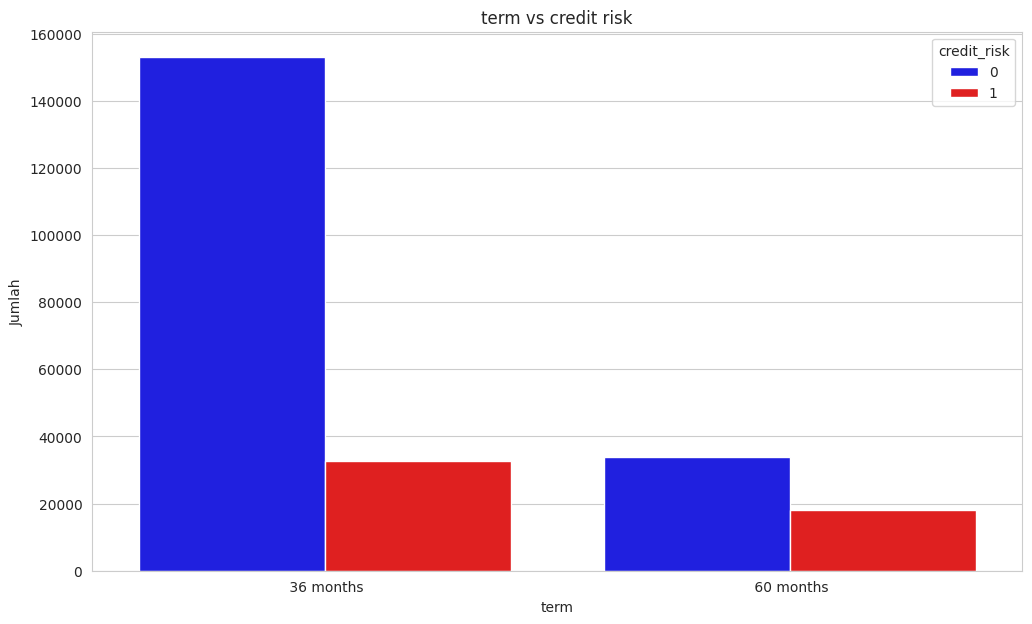

In [20]:
plt.figure(figsize=(12, 7))
sns.countplot(x='term', data=df_loan, order=sorted(df_loan['term'].unique()), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('term vs credit risk')
plt.xlabel('term')
plt.ylabel('Jumlah')
plt.show()

### emp length vs credit risk

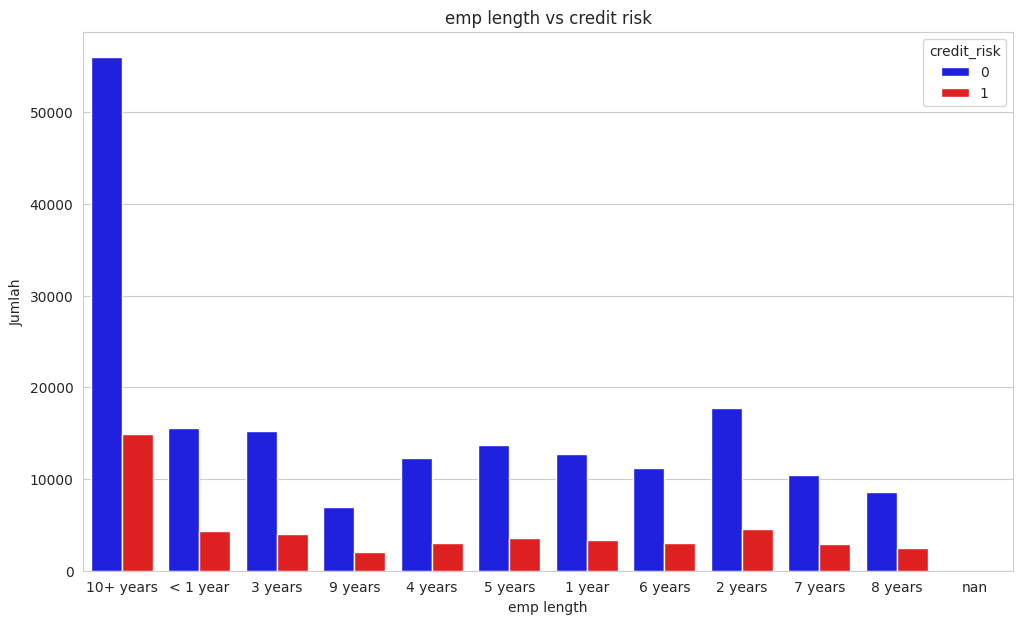

In [21]:
plt.figure(figsize=(12, 7))
sns.countplot(x='emp_length', data=df_loan, order=df_loan['emp_length'].unique(), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('emp length vs credit risk')
plt.xlabel('emp length')
plt.ylabel('Jumlah')
plt.show()

### home ownership vs credit risk

In [22]:
plt.figure(figsize=(12, 7))
sns.countplot(x='home_ownership', data=df_loan, order=sorted(df_loan['home_ownership'].unique()), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('home ownership vs credit risk')
plt.xlabel('home ownership')
plt.ylabel('Jumlah')
plt.show()

### purpose vs credit risk

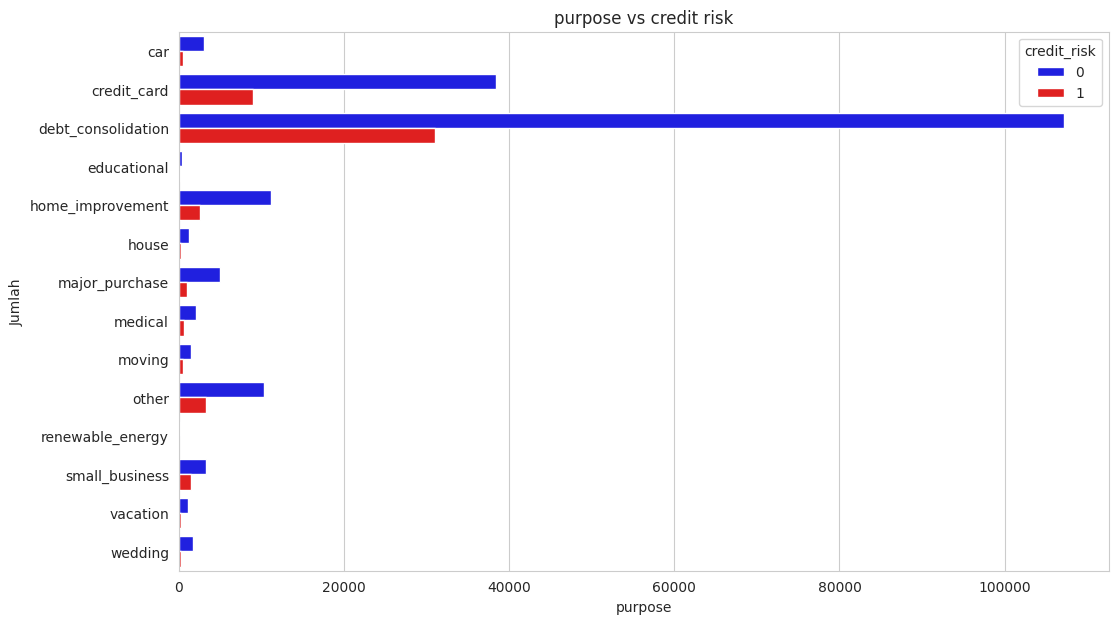

In [23]:
plt.figure(figsize=(12, 7))
sns.countplot(y='purpose', data=df_loan, order=sorted(df_loan['purpose'].unique()), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('purpose vs credit risk')
plt.xlabel('purpose')
plt.ylabel('Jumlah')
plt.show()

### region vs credit risk

In [24]:
plt.figure(figsize=(12, 7))
sns.countplot(x='addr_state', data=df_loan, order=sorted(df_loan['addr_state'].unique()), hue='credit_risk', palette={0:'blue', 1:'Red'})
plt.title('addr state vs credit risk')
plt.xlabel('addrstate')
plt.ylabel('Jumlah')
plt.show()

## NUMERIK

In [25]:
print(df_loan['credit_risk'].value_counts())

credit_risk
0    186727
1     50968
Name: count, dtype: int64


### int rate vs Credit Risk

/tmp/ipython-input-26-3683898692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='int_rate', data=df_loan, palette={'0': 'blue', '1': 'red'})


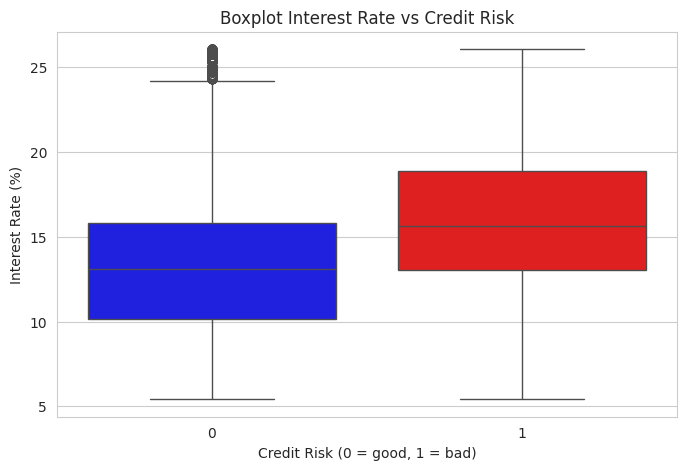

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='int_rate', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot Interest Rate vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('Interest Rate (%)')
plt.show()

### funded amnt vs Credit Risk

/tmp/ipython-input-27-3251232901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='funded_amnt', data=df_loan, palette={'0': 'blue', '1': 'red'})


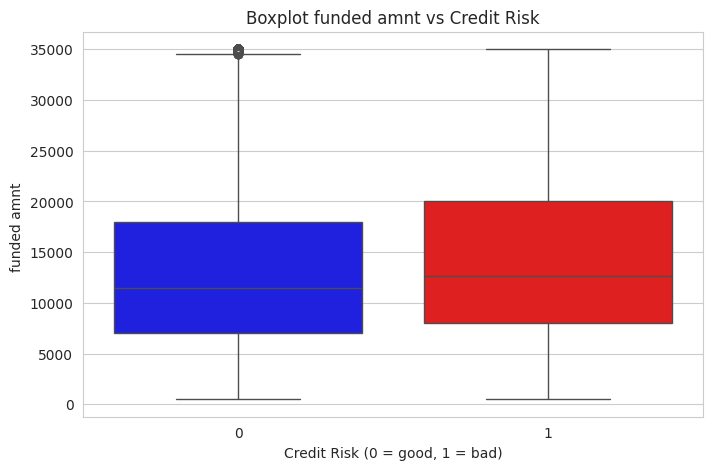

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='funded_amnt', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot funded amnt vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('funded amnt ')
plt.show()

### installment vs Credit Risk

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='installment', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot installment vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('installment')
plt.show()

/tmp/ipython-input-28-1039008529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='installment', data=df_loan, palette={'0': 'blue', '1': 'red'})


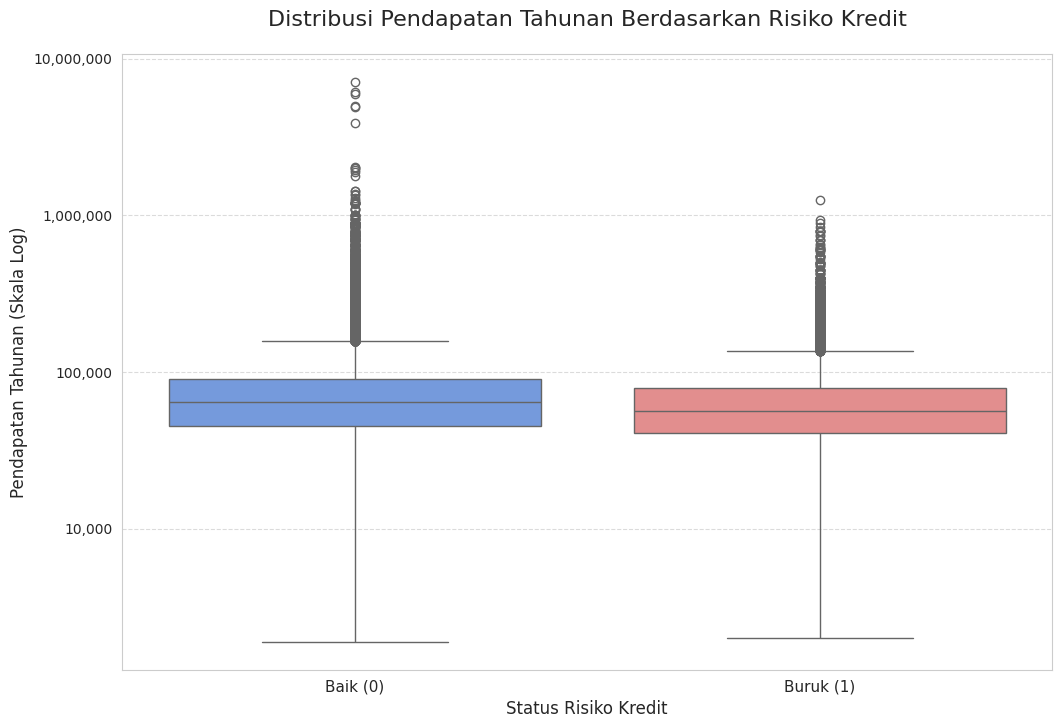

In [29]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    x='credit_risk',
    y='annual_inc',
    data=df_loan,
    hue='credit_risk', # Menggunakan hue untuk pewarnaan yang benar
    palette={0: 'cornflowerblue', 1: 'lightcoral'},
    legend=False # Legenda tidak diperlukan karena sumbu-x sudah jelas
)

plt.yscale('log')
plt.title('Distribusi Pendapatan Tahunan Berdasarkan Risiko Kredit', fontsize=16, pad=20)
plt.xlabel('Status Risiko Kredit', fontsize=12)
plt.ylabel('Pendapatan Tahunan (Skala Log)', fontsize=12)
plt.xticks([0, 1], ['Baik (0)', 'Buruk (1)'], fontsize=11)
formatter = FuncFormatter(lambda y, _: f'{int(y):,}')
ax.yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### dti vs Credit Risk

/tmp/ipython-input-30-485529426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='dti', data=df_loan, palette={'0': 'blue', '1': 'red'})


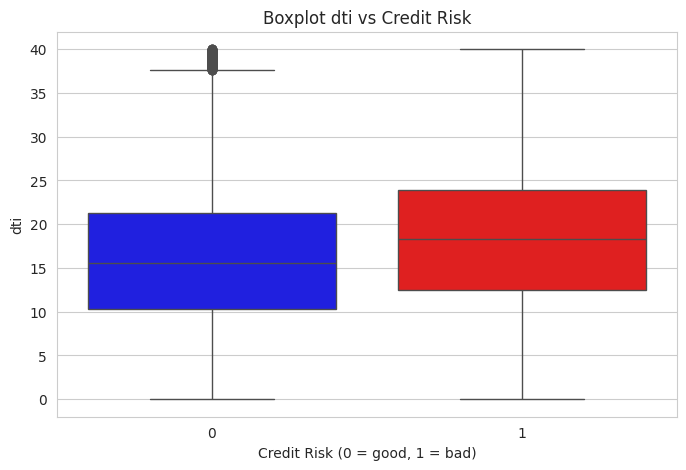

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='dti', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot dti vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('dti')
plt.show()

### total acc vs Credit Risk

/tmp/ipython-input-31-3231669888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='total_acc', data=df_loan, palette={'0': 'blue', '1': 'red'})


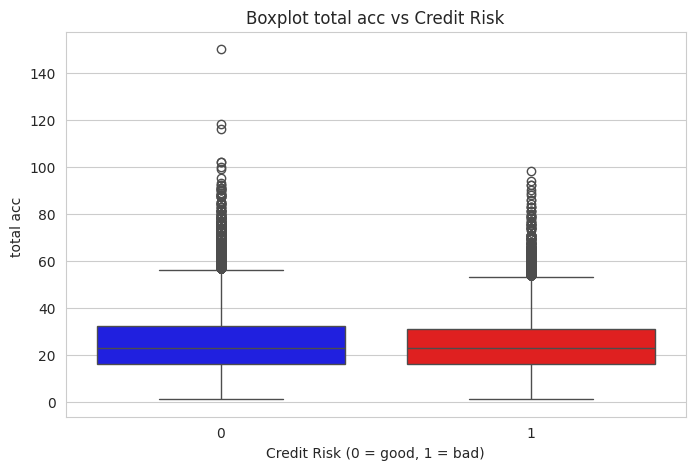

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='total_acc', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot total acc vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('total acc ')
plt.show()

### loan amnt vs Credit Risk

/tmp/ipython-input-32-2904227270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='loan_amnt', data=df_loan, palette={'0': 'blue', '1': 'red'})


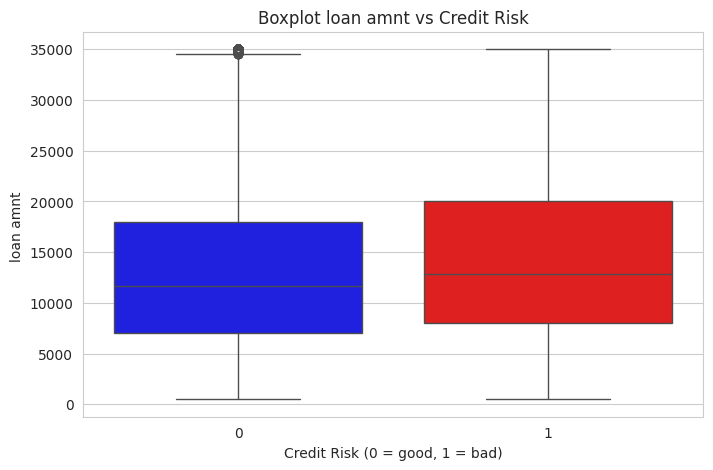

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='credit_risk', y='loan_amnt', data=df_loan, palette={'0': 'blue', '1': 'red'})

plt.title('Boxplot loan amnt vs Credit Risk')
plt.xlabel('Credit Risk (0 = good, 1 = bad)')
plt.ylabel('loan amnt ')
plt.show()

# DATA PREPARATION DAN FEATURE ENGINEERING

## MENGHAPUS KOLOM YANG TIDAK DI PERLUKAN

In [33]:
persentase_null_value = (df_loan.isnull().sum() / len(df_loan)) * 100
persentase = 60.0
cols_to_drop = persentase_null_value[persentase_null_value > persentase].index
df_loan.drop(columns=cols_to_drop, inplace=True)

*   Menghapus kolom yang memiliki => 60%



In [34]:
df_loan.shape

(237695, 54)

In [35]:
kolom_untuk_didelete = ['Unnamed: 0','emp_title','grade','loan_amnt','funded_amnt_inv','id', 'member_id', 'zip_code', 'url',
                        'application_type', 'policy_code','pymnt_plan','out_prncp','out_prncp_inv','total_pymnt',
                        'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                        'title']
df_loan.drop(columns=kolom_untuk_didelete, inplace=True)



*   Kolom 'Unnamed: 0','id', 'member_id', 'zip_code', 'url','pymnt_plan' di hapus karena tidak memiliki informasi berguna untuk prediksi


*   Kolom 'grade', sub_grade, memiliki nilai unik yang sama jadi 'grade' di hapus dan kolom sub_grade dipertahankan untuk mewakili kolom grade.serta untuk menghidari Multicollinearity.

*   Kolom 'loan_amnt','funded_amnt_inv' dan funded_amnt memiliki isi nilai yang sama jadi 'loan_amnt','funded_amnt_inv' dihapus dan kolom funded_amnt dipertahankan untuk mewakili loan_amnt, funded_amnt. serta untuk menghidari Multicollinearity.


*   Kolom 'application_type' hanya memilik 1 nilai unik

*   Kolom 'title' terlalu banyak nilai unik untuk kolom kategorikal

*  Kolom 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d' Memiliki data yang ada setelah pinjaman berjalan



## MENGATASI MISSING VALUE

In [36]:
cols_fill_zero = ['mths_since_last_delinq','collections_12_mths_ex_med','delinq_2yrs','inq_last_6mths','pub_rec','acc_now_delinq']

df_loan[cols_fill_zero] = df_loan[cols_fill_zero].fillna(0)



*   Kolom 'collections_12_mths_ex_med' saya mengisi dengan nilai 0 dengan asumsi bahwa nilai kosong itu artinya peminjam tidak ada catatan untuk  collections_12_mths_ex_med

*   kolom 'delinq_2yrs' saya mengisi dengan nilai 0 dengan asumsi bahwa nilai kosong itu artinya peminjam tidak pernah ada insiden kenakalan yang lewat dalam file kredit peminjam selama 2 tahun

*   kolom mths_since_last_delinq saya mengisi dengan nilai 0 dengan asumsi bahwa nilai kosong itu artinya peminjam tidak pernah telat membayar sehingga tidak ada datanya atau kosong

*   dan untuk kolom 'inq_last_6mths','pub_rec','acc_now_delinq' sama dengan di atas







In [37]:
for col in['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','open_acc','total_acc','annual_inc','revol_util']:
    median_value= df_loan[col].median()
    df_loan[col].fillna(median_value, inplace= True)

/tmp/ipython-input-37-713446092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loan[col].fillna(median_value, inplace= True)


Mengisi dengan nilai median agar tidak terpengaruh oleh outlier

In [38]:
df_loan['emp_length'] = df_loan['emp_length'].fillna('Others')

Memasukan nilai kosong ke dalam satu kategori baru yaitu Others agar lebih aman dan tidak mengganggu distribusi nilai yang lain

In [39]:
df_loan = df_loan[df_loan['delinq_2yrs'] != 29]

Menghapus nilai yang janggal pada kolom delinq_2year yang dimana isi nilai ini seharusnya antara 0 sampai 24 yang menunjukan jumlah bulan dalam 2 tahun

In [40]:
df_loan.dropna(subset=['earliest_cr_line'], inplace=True)

/tmp/ipython-input-40-1061711790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan.dropna(subset=['earliest_cr_line'], inplace=True)


Menghapus baris pada nilai kosong 'earliest_cr_line' karena hanya sedikit nilai kosong pada kolom 'earliest_cr_line'

## CHECK MISSING VALUE SETELAH MEMBERSIHKAN DATA

In [41]:
df_loan.isnull().sum()

funded_amnt                   0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
credit_risk                   0
dtype: int64

## MENGUBAH DC DENGAN ND PADA KOLOM addr_state

In [42]:
df_loan['addr_state'] = df_loan['addr_state'].replace('DC', 'ND')

Karena tidak ada kode DC untuk kota di negara amerika

## FEATURE ENGINEERING KOLOM region

In [43]:
region_mapping = {
    'West': ['CA', 'WA', 'MT', 'HI', 'AK', 'OR', 'ID', 'WY', 'NV', 'CO', 'UT'],
    'Northeast': ['NY', 'NJ', 'PA', 'CT', 'NH', 'RI', 'ME','MA', 'DE','MD','VT'],
    'SouthWest': ['TX', 'AZ', 'NM', 'OK'],
    'SouthEast' :['AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'FL', 'GA'],
    'Midwest': ['IL', 'SD', 'ND', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'MI', 'IN', 'OH']
}
def get_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region

#Membuat kolom baru 'region'
df_loan['region'] = df_loan['addr_state'].apply(get_region)
df_loan.drop('addr_state',axis=1, inplace=True)
print(df_loan['region'].value_counts())


region
West         62846
Northeast    55874
SouthEast    53783
Midwest      38149
SouthWest    27013
Name: count, dtype: int64


Nilai unik pada addr_state terlalu banyak dan dilakukan grouping agar nilai unik berkurang dan di masukan ke dalam kolom baru 'region'

## FEATURE ENGINEERING PADA KOLOM issue_d DAN earliest_cr_line

In [44]:
def convert_to_4_digit_year(date_str):


    month, year_2d_str = date_str.split('-')
    year_2d = int(year_2d_str)
    if year_2d > 14:

        year_4d = 1900 + year_2d
    else:
        year_4d = 2000 + year_2d

    return f"{month}-{year_4d}"


df_loan['issue_d_clean'] = df_loan['issue_d'].apply(convert_to_4_digit_year)
df_loan['earliest_cr_line_clean'] = df_loan['earliest_cr_line'].apply(convert_to_4_digit_year)

df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d_clean'], format='%b-%Y')
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line_clean'], format='%b-%Y')

df_loan.drop(columns=['issue_d_clean', 'earliest_cr_line_clean'], inplace=True)


print(df_loan[['issue_d', 'earliest_cr_line']].head(2))


     issue_d earliest_cr_line
0 2011-12-01       1985-01-01
1 2011-12-01       1999-04-01




*   Mengubah tipe data pada kolom issue_d dan earliest_cr_line menjadi datetime kemudian mengubah formatnya menjadi YYYY-MM-DD.
*   Aturan di bawah agar mudah mengubah tahun di bawah 2000 :



1.   Jika tahun pada data lebih dari 14 seperti 89 maka menjadi tahun 1900 + angka tahun pada data
2.   Jika tahun tidak lebih dari 14 seperti 12 maka menjadi tahun 2000 + angka tahun pada data






In [45]:
def process_dates_full(df):
    df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format='%b-%Y')
    df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%Y')

    # MEMBUAT FITUR BARU: credit_history_length
    df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 30

    # Membuat fitur baru: issue_year
    df['issue_year'] = df['issue_d'].dt.year

    # Membuat fitur baru: issue_month
    df['issue_month'] = df['issue_d'].dt.month


    df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)
    return df


df = process_dates_full(df_loan)

In [46]:
df_loan.head(5).T

0                1               2  \
funded_amnt                        5000             2500            2400   
term                          36 months        60 months       36 months   
int_rate                          10.65            15.27           15.96   
installment                      162.87            59.83           84.33   
sub_grade                            B2               C4              C5   
emp_length                    10+ years         < 1 year       10+ years   
home_ownership                     RENT             RENT            RENT   
annual_inc                      24000.0          30000.0         12252.0   
verification_status            Verified  Source Verified    Not Verified   
purpose                     credit_card              car  small_business   
dti                               27.65              1.0            8.72   
delinq_2yrs                         0.0              0.0             0.0   
inq_last_6mths                      1.0              5.0             2.0   
mths_since_last_delinq              0.0              0.0             0.0   
open_acc                            3.0              3.0             2.0   
pub_rec                             0.0              0.0             0.0   
revol_bal                         13648             1687            2956   
revol_util                         83.7              9.4            98.5   
total_acc                           9.0              4.0            10.0   
initial_list_status                   f                f               f   
collections_12_mths_ex_med          0.0              0.0             0.0   
acc_now_delinq                      0.0              0.0             0.0   
tot_coll_amt                        0.0              0.0             0.0   
tot_cur_bal                     79289.0          79289.0         79289.0   
total_rev_hi_lim                22000.0          22000.0         22000.0   
credit_risk                           0                1               0   
region                        SouthWest        SouthEast         Midwest   
credit_history_length        327.666667       154.233333      122.733333   
issue_year                         2011             2011            2011   
issue_month                          12               12              12   

                                          3                5  
funded_amnt                           10000             5000  
term                              36 months        36 months  
int_rate                              13.49              7.9  
installment                          339.31           156.46  
sub_grade                                C1               A4  
emp_length                        10+ years          3 years  
home_ownership                         RENT             RENT  
annual_inc                          49200.0          36000.0  
verification_status         Source Verified  Source Verified  
purpose                               other          wedding  
dti                                    20.0             11.2  
delinq_2yrs                             0.0              0.0  
inq_last_6mths                          1.0              3.0  
mths_since_last_delinq                 35.0              0.0  
open_acc                               10.0              9.0  
pub_rec                                 0.0              0.0  
revol_bal                              5598             7963  
revol_util                             21.0             28.3  
total_acc                              37.0             12.0  
initial_list_status                       f                f  
collections_12_mths_ex_med              0.0              0.0  
acc_now_delinq                          0.0              0.0  
tot_coll_amt                            0.0              0.0  
tot_cur_bal                         79289.0          79289.0  
total_rev_hi_lim                    22000.0          22000.0  
credit_risk                               0

## MENGATASI OUTLIER

In [47]:
numerical_cols_IQR = ['mths_since_last_delinq','tot_cur_bal', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rev_hi_lim']

for col in numerical_cols_IQR:

    print(f"\n--- Statistik '{col}' SEBELUM IQR ---")
    print(df_loan[col].describe())

    Q1 = df_loan[col].quantile(0.25)
    Q3 = df_loan[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_loan[col] = np.where(df_loan[col] > upper_bound, upper_bound,
                       np.where(df_loan[col] < lower_bound, lower_bound, df_loan[col]))


    print(f"\n--- Statistik '{col}' SETELAH IQR ---")
    print(df_loan[col].describe())


--- Statistik 'mths_since_last_delinq' SEBELUM IQR ---
count    237665.000000
mean         15.391185
std          22.605678
min           0.000000
25%           0.000000
50%           0.000000
75%          28.000000
max         152.000000
Name: mths_since_last_delinq, dtype: float64

--- Statistik 'mths_since_last_delinq' SETELAH IQR ---
count    237665.000000
mean         15.161913
std          21.992640
min           0.000000
25%           0.000000
50%           0.000000
75%          28.000000
max          70.000000
Name: mths_since_last_delinq, dtype: float64

--- Statistik 'tot_cur_bal' SEBELUM IQR ---
count    2.376650e+05
mean     1.205386e+05
std      1.300344e+05
min      0.000000e+00
25%      3.973800e+04
50%      7.928900e+04
75%      1.569130e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

--- Statistik 'tot_cur_bal' SETELAH IQR ---
count    237665.000000
mean     111027.090445
std       95510.816480
min           0.000000
25%       39738.000000
50%       79289




*   Menggunakan IQR untuk mengatasi outlier dengan menentukan batas atas dan bawah, sehingga nilai yang lebih dari batas atas akan di jadikan nilai yang sama dengan batas atas dan begitu juga untuk batas bawah
*   Ada beberapa kolom numerik yang tidak bisa dengan IQR karena data 25% 50% dan 75% nya adalah 0



## SPLIT DATA

In [48]:
X = df_loan.drop('credit_risk', axis=1)
y = df_loan['credit_risk']

print("Data Sebelum di-Split")
print(f"Bentuk Fitur (X): {X.shape}")
print(f"Bentuk Target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9,
)

print("Data Setelah di-Split ")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")

print("\nVerifikasi proporsi target di train set:")
print(y_train.value_counts(normalize=True))

print("\nVerifikasi proporsi target di test set:")
print(y_test.value_counts(normalize=True))

Data Sebelum di-Split
Bentuk Fitur (X): (237665, 29)
Bentuk Target (y): (237665,)
Data Setelah di-Split 
Bentuk X_train: (190132, 29)
Bentuk X_test: (47533, 29)
Bentuk y_train: (190132,)
Bentuk y_test: (47533,)

Verifikasi proporsi target di train set:
credit_risk
0    0.786306
1    0.213694
Name: proportion, dtype: float64

Verifikasi proporsi target di test set:
credit_risk
0    0.782572
1    0.217428
Name: proportion, dtype: float64


 "test_size=0.2" membagi data 80% untuk train dan 20% untuk test

## ENCODING KOLOM KATEGORIKAL

Melakukan Encoding dan Scaling setelah melakukan split data agar data test tidak bocor

In [49]:
ordinal_cols = ['sub_grade','emp_length']
nominal_cols = ['term','home_ownership','verification_status','purpose',
                'initial_list_status','region']

# Ordinal Encoding
grade_order = ['G5','G4','G3','G2','G1', 'F5','F4','F3','F2','F1',
               'E5','E4','E3','E2','E1', 'D5','D4','D3','D2','D1',
               'C5','C4','C3','C2','C1', 'B5','B4','B3','B2','B1',
               'A5','A4','A3','A2','A1']
emp_length_order = [
    'Others','< 1 year', '1 year', '2 years', '3 years', '4 years',
    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
]
or_encoder = OrdinalEncoder(categories=[grade_order,emp_length_order])


X_train[ordinal_cols] = or_encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = or_encoder.transform(X_test[ordinal_cols])



# One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)

train_encoded_cols = ohe.fit_transform(X_train[nominal_cols])
X_train_encoded = pd.DataFrame(train_encoded_cols, columns=ohe.get_feature_names_out(nominal_cols), index=X_train.index)
X_train_final = pd.concat([X_train.drop(columns=nominal_cols), X_train_encoded], axis=1)


test_encoded_cols = ohe.transform(X_test[nominal_cols])
X_test_encoded = pd.DataFrame(test_encoded_cols, columns=ohe.get_feature_names_out(nominal_cols), index=X_test.index)
X_test_final = pd.concat([X_test.drop(columns=nominal_cols), X_test_encoded], axis=1)



print("\nX_train_final:")
X_train_final.head(2)
print("\nX_test_final:")
X_test_final.head(2)


X_train_final:

X_test_final:


funded_amnt  int_rate  installment  sub_grade  emp_length  annual_inc  \
29886         11000      7.88       222.41       30.0         9.0     35000.0   
270512         7000     12.49       234.15       25.0        11.0     45000.0   

          dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  \
29886    9.94          0.0             0.0                     0.0       9.0   
270512  16.03          0.0             0.0                    53.0       7.0   

        pub_rec  revol_bal  revol_util  total_acc  collections_12_mths_ex_med  \
29886       0.0       11.0         0.0       28.0                         0.0   
270512      1.0     4474.0        53.9       35.0                         0.0   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
29886              0.0           0.0      79289.0           22000.0   
270512             0.0       12604.0      23293.0            8300.0   

        credit_history_length  issue_year  issue_month  term_ 60 months  \
29886              239.400000        2010            5              1.0   
270512             227.233333        2014           10              0.0   

        home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
29886                       1.0                  0.0                   0.0   
270512                      0.0                  0.0                   0.0   

        home_ownership_OWN  home_ownership_RENT  \
29886                  0.0                  0.0   
270512                 0.0                  1.0   

        verification_status_Source Verified  verification_status_Verified  \
29886                                   0.0                           0.0   
270512                                  1.0                           0.0   

        purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
29886                   0.0                         0.0                  0.0   
270512                  0.0                         1.0                  0.0   

        purpose_home_improvement  purpose_house  purpose_major_purchase  \
29886                        1.0            0.0                     0.0   
270512                       0.0            0.0                     0.0   

        purpose_medical  purpose_moving  purpose_other  \
29886               0.0             0.0            0.0   
270512              0.0             0.0            0.0   

        purpose_renewable_energy  purpose_small_business  purpose_vacation  \
29886                        0.0                     0.0               0.0   
270512                       0.0                     0.0               0.0   

        purpose_wedding  initial_list_status_w  region_Northeast  \
29886               0.0                    0.0               1.0   
270512              0.0                    1.0               0.0   

        region_SouthEast  region_SouthWest  region_West  
29886                0.0               0.0          0.0  
270512               0.0               0.0          1.0





*   Menggunakan OneHotEncoding untuk data Nominal, dan Ordinal Encoding untuk data Ordinal seperti pada kolom sub_grade, emp_length
*   order digunakan untuk menentukan urutan kategori unik pada proses Encoding, Jika tidak proses Encoding akan mulai berdasarkan abjad
*   drop='first' pada OHE akan menghapus kolom pertama setelah di Encoding untuk mengurangi jumlah kolom setelah encoding.





In [50]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190132 entries, 355124 to 134091
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   funded_amnt                          190132 non-null  int64  
 1   int_rate                             190132 non-null  float64
 2   installment                          190132 non-null  float64
 3   sub_grade                            190132 non-null  float64
 4   emp_length                           190132 non-null  float64
 5   annual_inc                           190132 non-null  float64
 6   dti                                  190132 non-null  float64
 7   delinq_2yrs                          190132 non-null  float64
 8   inq_last_6mths                       190132 non-null  float64
 9   mths_since_last_delinq               190132 non-null  float64
 10  open_acc                             190132 non-null  float64
 11  pub_rec      

## SMOTE

In [51]:
#smote = SMOTE(random_state=9)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

#print(pd.Series(y_train).value_counts())

## CORRELATION HEATMAP

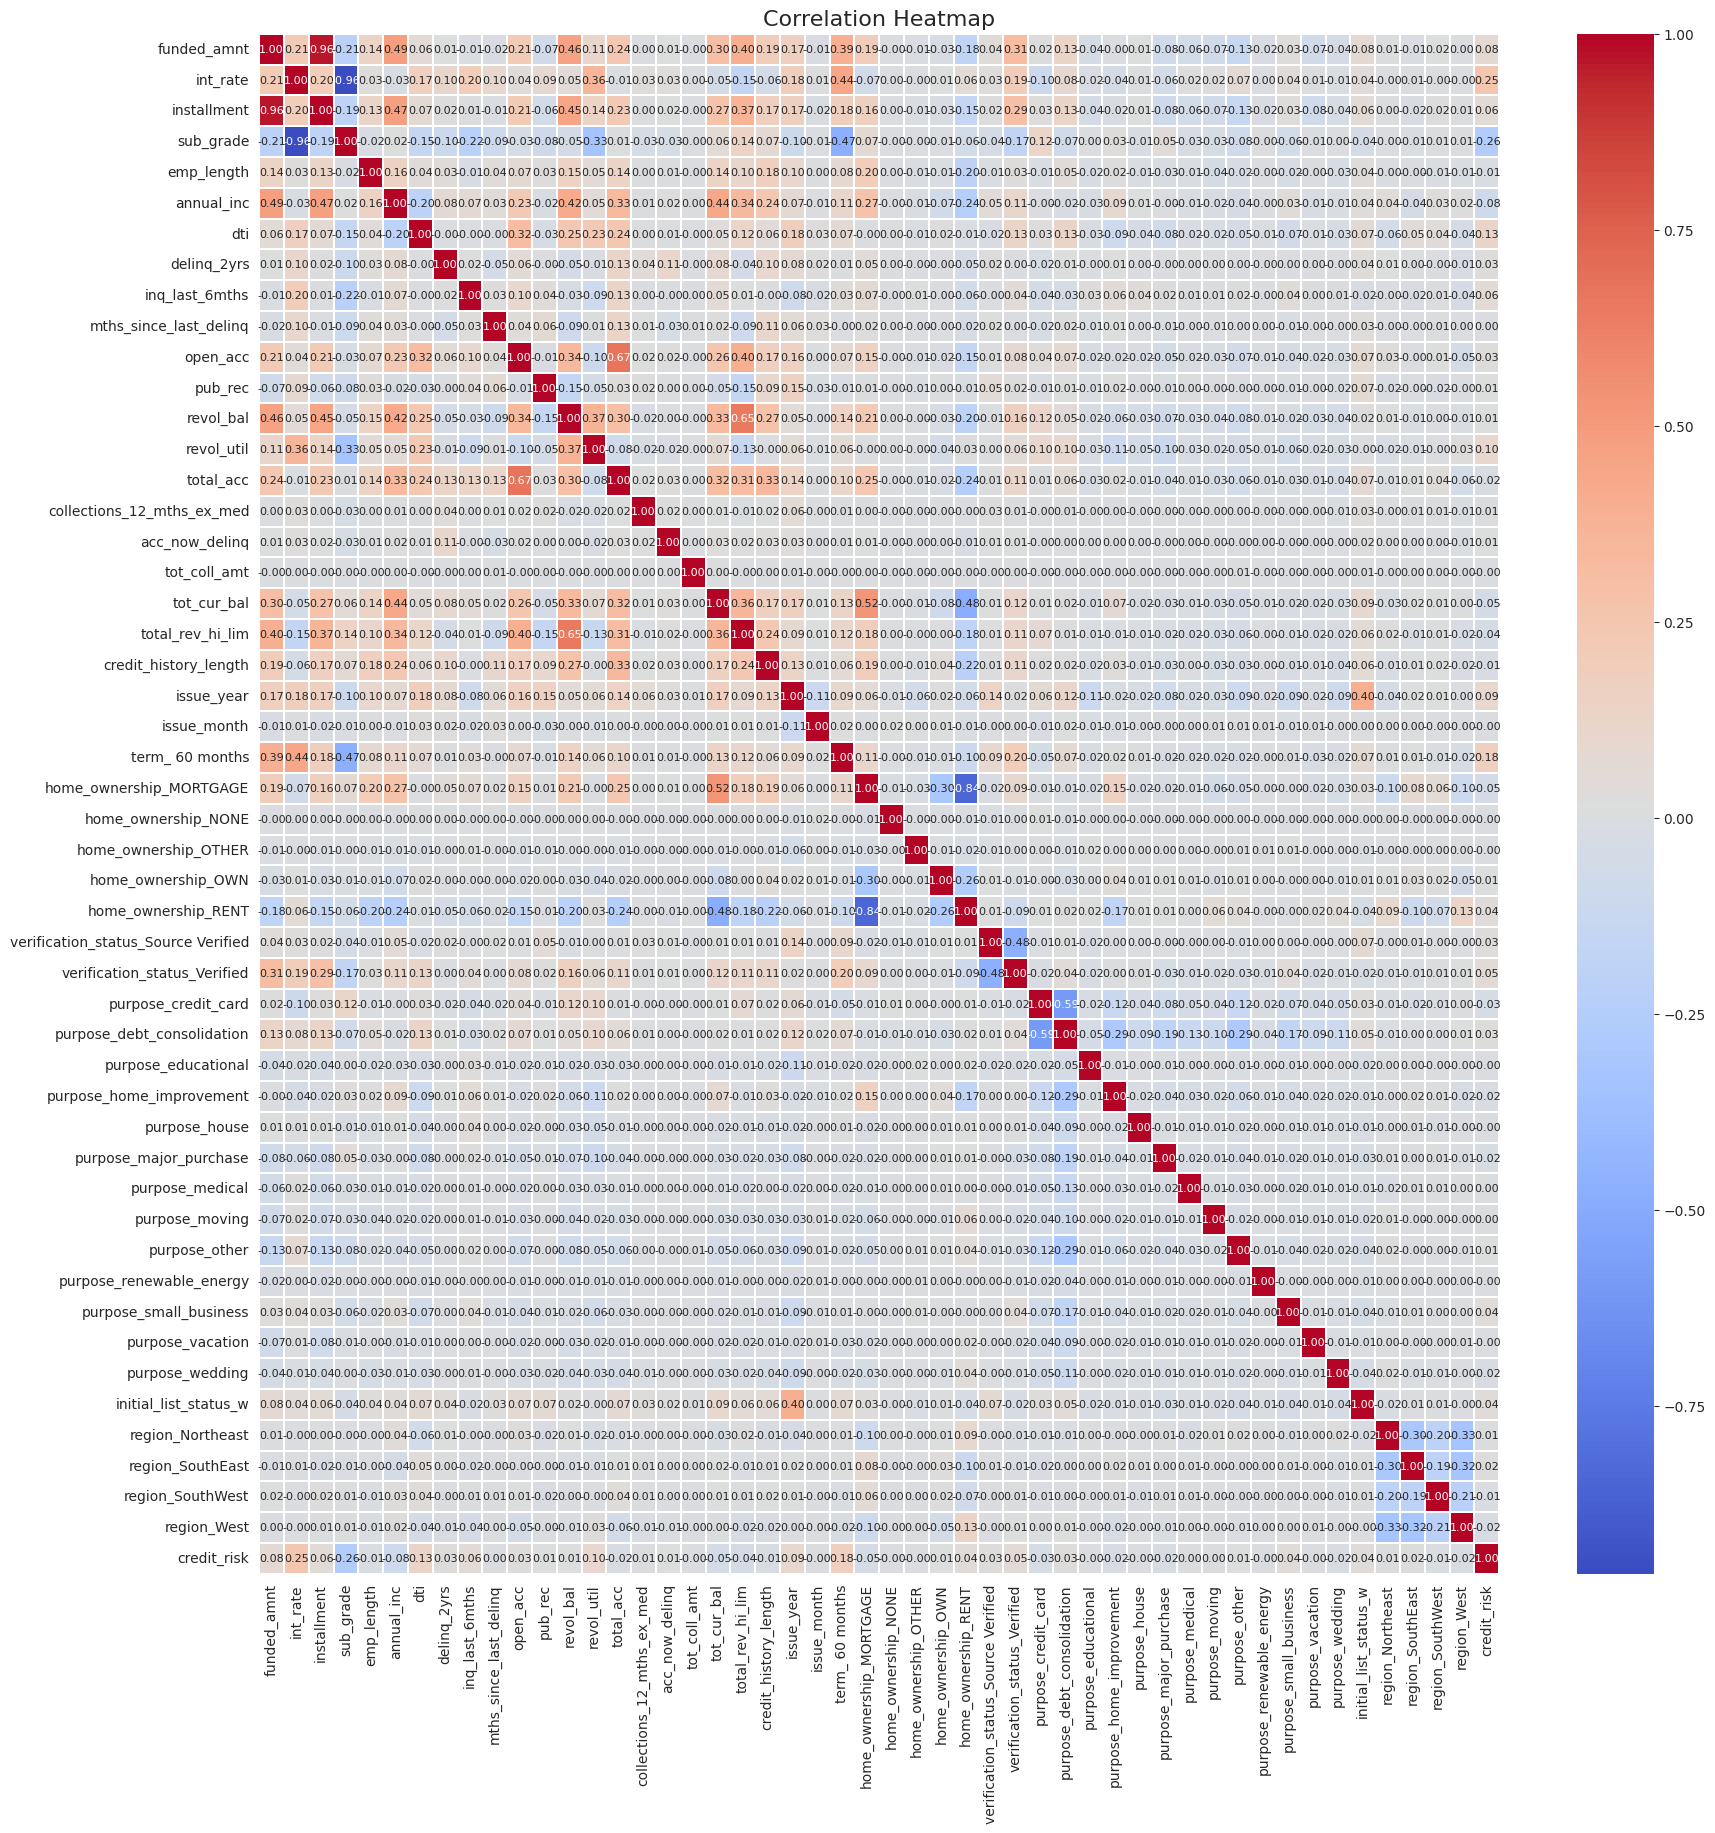

In [52]:
credit_risk_train = pd.concat([X_train_final, y_train], axis=1)
corr = credit_risk_train.corr()

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1, annot_kws={"size": 8})


heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## SCALING

In [53]:


scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_final), columns=X_train_final.columns, index=X_train_final.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns, index=X_test_final.index)




# MODELING

In [54]:
print("\n" + "="*20, "PROSES HYPERPARAMETER TUNING", "="*20)

log_reg = LogisticRegression(random_state=9, class_weight='balanced')


param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'solver': ['liblinear', 'saga']
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='recall', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Parameter terbaik yang ditemukan: {grid_search.best_params_}")



==================== PROSES HYPERPARAMETER TUNING ====================
Parameter terbaik yang ditemukan: {'C': 0.001, 'solver': 'liblinear'}


class_weight='balanced' memberikan bobot agar class target seimbang antara Good dan Bad

Menggunakan Kfold untuk membagi data train menjadi 5 saat di train pada model

Hyperparamater menggunakan gridsearchCV untuk menemukan parameter terbaik

#EVALUASI


==================== EVALUASI MODEL TERBAIK PADA DATA UJI ====================

Hasil Evaluasi pada Data Uji:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75     37198
           1       0.35      0.64      0.45     10335

    accuracy                           0.66     47533
   macro avg       0.61      0.65      0.60     47533
weighted avg       0.76      0.66      0.69     47533



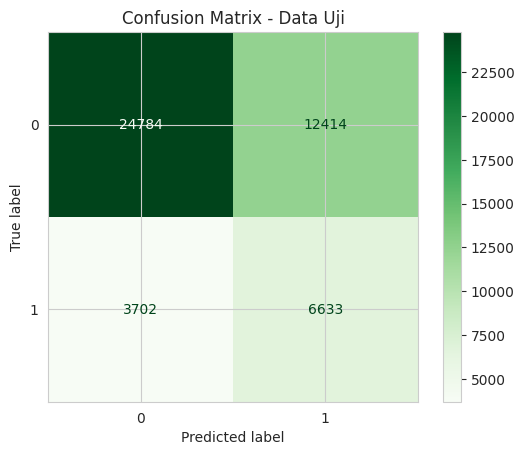


==================== EVALUASI MODEL TERBAIK PADA DATA LATIH ====================

Hasil Evaluasi pada Data Latih:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75    149502
           1       0.34      0.65      0.45     40630

    accuracy                           0.66    190132
   macro avg       0.61      0.65      0.60    190132
weighted avg       0.76      0.66      0.69    190132



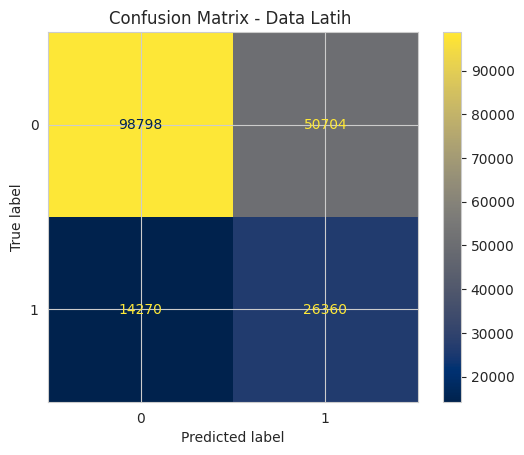

In [55]:
print("\n" + "="*20, "EVALUASI MODEL TERBAIK PADA DATA UJI", "="*20)
y_pred_test = best_model.predict(X_test_scaled)
print("\nHasil Evaluasi pada Data Uji:")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, cmap='Greens')
plt.title("Confusion Matrix - Data Uji")
plt.show()

print("\n" + "="*20, "EVALUASI MODEL TERBAIK PADA DATA LATIH", "="*20)
y_pred_train = best_model.predict(X_train_scaled)
print("\nHasil Evaluasi pada Data Latih:")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_estimator(best_model, X_train_scaled, y_train, cmap='cividis')
plt.title("Confusion Matrix - Data Latih ")
plt.show()

## FEATURE IMPORTANCE


==================== ANALISIS FEATURE IMPORTANCE ====================
Fitur Paling Berpengaruh Berdasarkan Koefisien Model:
                                  Fitur  Koefisien
5                            annual_inc  -0.268430
3                             sub_grade  -0.239964
23                      term_ 60 months   0.196130
21                           issue_year   0.165086
6                                   dti   0.156920
1                              int_rate   0.148714
14                            total_acc  -0.135042
10                             open_acc   0.125723
0                           funded_amnt   0.119434
13                           revol_util   0.115043
8                        inq_last_6mths   0.113478
41               purpose_small_business   0.104164
18                          tot_cur_bal  -0.082224
7                           delinq_2yrs   0.055115
39                        purpose_other   0.050637
19                     total_rev_hi_lim  -0.050335
45      

/tmp/ipython-input-56-1633771725.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koefisien', y='Fitur', data=feature_importance, palette='viridis')


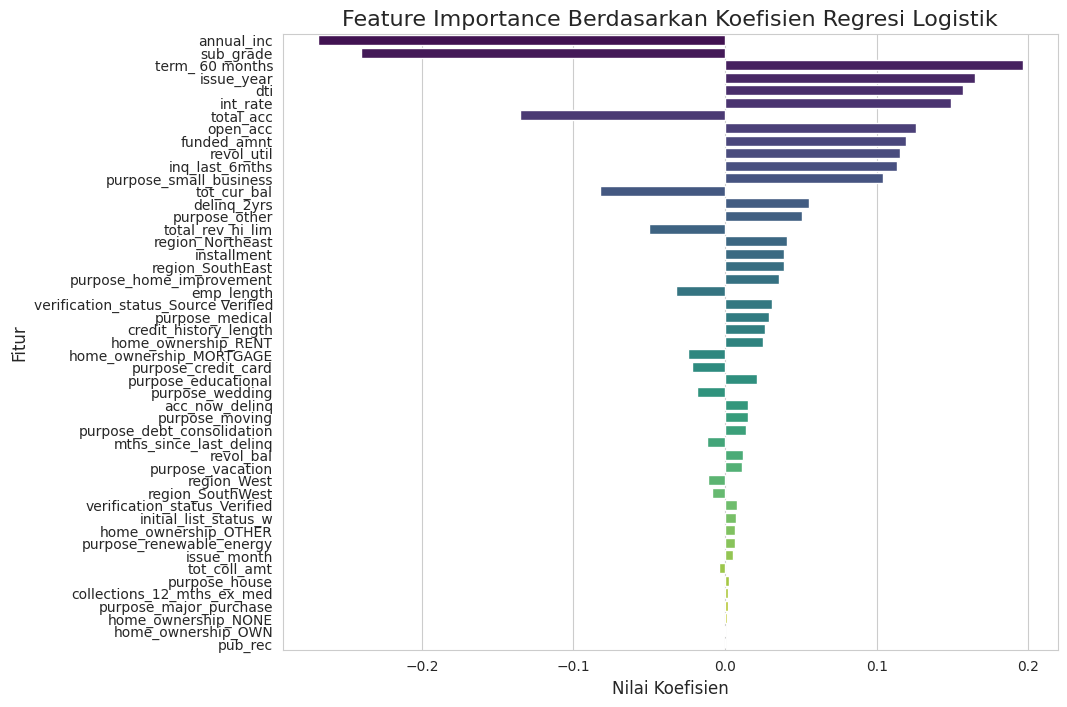

In [56]:
print("\n" + "="*20, "ANALISIS FEATURE IMPORTANCE", "="*20)


coefficients = best_model.coef_[0]

feature_importance = pd.DataFrame({
    'Fitur': X_train_scaled.columns,
    'Koefisien': coefficients
})

feature_importance['abs_coefficient'] = feature_importance['Koefisien'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False).drop(columns='abs_coefficient')

print("Fitur Paling Berpengaruh Berdasarkan Koefisien Model:")
print(feature_importance)

plt.figure(figsize=(10, 8))
sns.barplot(x='Koefisien', y='Fitur', data=feature_importance, palette='viridis')
plt.title('Feature Importance Berdasarkan Koefisien Regresi Logistik', fontsize=16)
plt.xlabel('Nilai Koefisien', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()


#MODELING RANDOM FOREST

In [58]:
print("\n" + "="*20, "TUNING MODEL RANDOM FOREST", "="*20)

rf = RandomForestClassifier(random_state=9, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [300, 400 ],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,cv=3, scoring='recall', n_jobs=2)
grid_search_rf.fit(X_train_scaled, y_train)
best_model_rf = grid_search_rf.best_estimator_
print(f"Parameter terbaik untuk Random Forest: {grid_search_rf.best_params_}")




==================== TUNING MODEL RANDOM FOREST ====================


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Parameter terbaik untuk Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


#EVALUASI RF


==================== EVALUASI MODEL RANDOM FOREST ====================

Hasil Evaluasi pada Data Uji:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76     37198
           1       0.35      0.63      0.45     10335

    accuracy                           0.67     47533
   macro avg       0.61      0.65      0.61     47533
weighted avg       0.76      0.67      0.69     47533



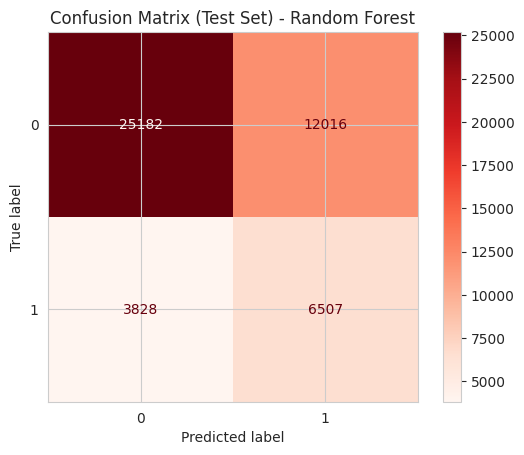


Hasil Evaluasi pada Data Latih:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78    149502
           1       0.37      0.68      0.48     40630

    accuracy                           0.69    190132
   macro avg       0.63      0.69      0.63    190132
weighted avg       0.78      0.69      0.71    190132



In [59]:
# ---  Evaluasi Model Terbaik (Random Forest) ---
print("\n" + "="*20, "EVALUASI MODEL RANDOM FOREST", "="*20)

# Evaluasi pada Data Uji
y_pred_rf_test = best_model_rf.predict(X_test_scaled)
print("\nHasil Evaluasi pada Data Uji:")
print(classification_report(y_test, y_pred_rf_test))
ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test_scaled, y_test, cmap='Reds')
plt.title("Confusion Matrix (Test Set) - Random Forest")
plt.show()

# Evaluasi pada Data Latih
y_pred_rf_train = best_model_rf.predict(X_train_scaled)
print("\nHasil Evaluasi pada Data Latih:")
print(classification_report(y_train, y_pred_rf_train))



##FEATURE IMPORTANCE RF


==================== ANALISIS FEATURE IMPORTANCE (RANDOM FOREST) ====================
Fitur Paling Berpengaruh Berdasarkan Random Forest:
                                  Fitur  Importance
1                              int_rate    0.220452
3                             sub_grade    0.205510
23                      term_ 60 months    0.095693
6                                   dti    0.064421
5                            annual_inc    0.062845
21                           issue_year    0.039139
18                          tot_cur_bal    0.036807
13                           revol_util    0.035604
0                           funded_amnt    0.029196
2                           installment    0.028627
19                     total_rev_hi_lim    0.021421
20                credit_history_length    0.018152
12                            revol_bal    0.018074
14                            total_acc    0.015637
4                            emp_length    0.012839
8                        inq_

/tmp/ipython-input-60-3883223491.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feature_importance_rf, palette='viridis')


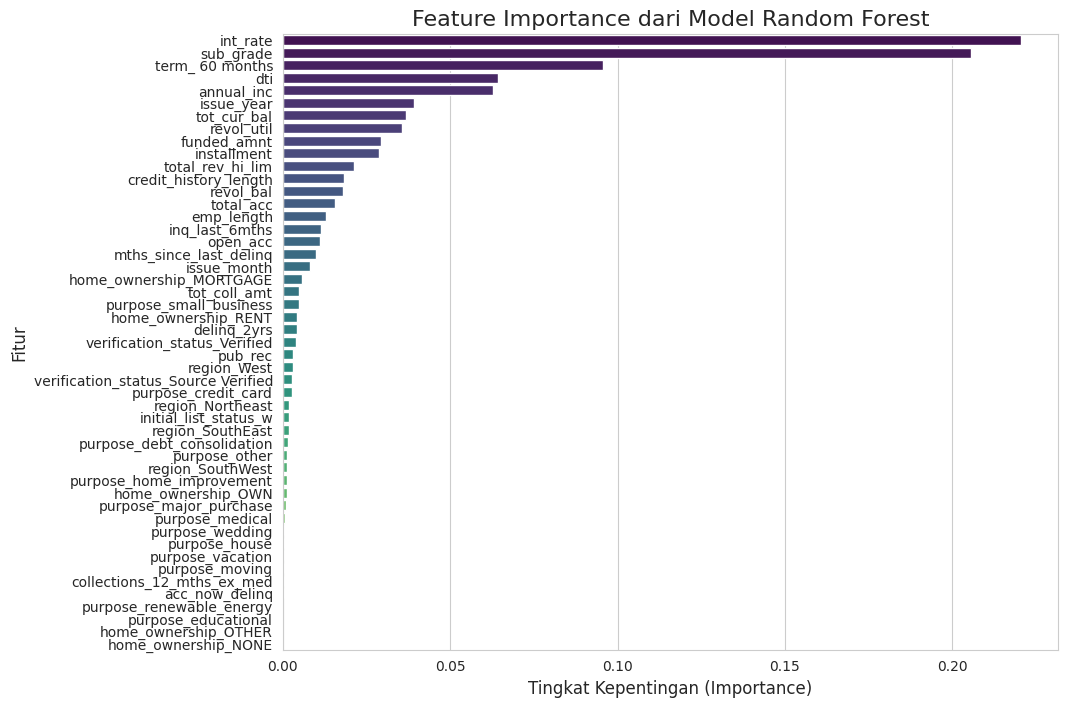

In [60]:

# ---  Analisis Feature Importance (Random Forest) ---
print("\n" + "="*20, "ANALISIS FEATURE IMPORTANCE (RANDOM FOREST)", "="*20)

importances = best_model_rf.feature_importances_
feature_names = X_train_scaled.columns

feature_importance_rf = pd.DataFrame({'Fitur': feature_names, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("Fitur Paling Berpengaruh Berdasarkan Random Forest:")
print(feature_importance_rf)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Fitur', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance dari Model Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()